In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Import library
from sklearn.model_selection import train_test_split
# Normalization method
from sklearn.preprocessing import MinMaxScaler
#Import lib
import statsmodels.api as sm

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

<h2 style = "color : Brown"> Data- Loading and Exploring </h2>

In [3]:
# Read the data from csv
housingdf = pd.read_csv('train.csv')
housingdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Inspecting Data
print(housingdf.shape)
print(housingdf.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

<h2 style = "color : Brown">Data Handling and Cleaning</h2>

### Treating Missing Values

In [5]:
# Find the column names with all null values , so that we can discrad them off for analysis
housingdf.columns[housingdf.isna().all()].tolist() 

[]

In [6]:
# Find the column names with at least few null values
columnsWithNulls=housingdf.columns[housingdf.isna().sum()>0].tolist() 
housingdf[columnsWithNulls].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### The Below columns Have at least few null values 
  
  LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature

#### Replacing NA values to appropriate names
As per Data Dictionary ,For few columns the NA value represents the `not present of the feature` in the house instead of representing the missing values.
Hence, we need to impute the missing values to the relevant name.

In [7]:
housingdf['Alley'] = housingdf['Alley'].replace(np.nan, 'No Alley')
housingdf['BsmtQual'] = housingdf['BsmtQual'].replace(np.nan, 'No Basement')
housingdf['BsmtCond'] = housingdf['BsmtCond'].replace(np.nan, 'No Basement')
housingdf['BsmtExposure'] = housingdf['BsmtExposure'].replace(np.nan, 'No Basement')
housingdf['BsmtFinType1'] = housingdf['BsmtFinType1'].replace(np.nan, 'No Basement')
housingdf['BsmtFinType2'] = housingdf['BsmtFinType2'].replace(np.nan, 'No Basement')
housingdf['FireplaceQu'] = housingdf['FireplaceQu'].replace(np.nan, 'No Fireplace')
housingdf['GarageType'] = housingdf['GarageType'].replace(np.nan, 'No Garage')
housingdf['GarageFinish'] = housingdf['GarageFinish'].replace(np.nan, 'No Garage')
housingdf['GarageQual'] = housingdf['GarageQual'].replace(np.nan, 'No Garage')
housingdf['GarageCond'] = housingdf['GarageCond'].replace(np.nan, 'No Garage')
housingdf['PoolQC'] = housingdf['PoolQC'].replace(np.nan, 'No Pool')
housingdf['Fence'] = housingdf['Fence'].replace(np.nan, 'No Fence')
housingdf['MiscFeature'] = housingdf['MiscFeature'].replace(np.nan, 'No MiscFeature')

In [8]:
# Checking percentage of missing values in columns
(round(100*(housingdf.isnull().sum()/len(housingdf.index)),2)).to_frame('NullCount').sort_values(by='NullCount' , ascending=False)

,NullCount
LotFrontage,17.74
GarageYrBlt,5.55
MasVnrType,0.55
MasVnrArea,0.55
Electrical,0.07
...,...
ExterCond,0.00
ExterQual,0.00
Exterior2nd,0.00
Exterior1st,0.00


##### Let's Fix LotFrontage

In [9]:
#Check the distribution of the value of the LotFrontage column
housingdf['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

##### Observations:
 - Mean and Median are almost same (70) for LotFrontage column.
 - We will impute the missing values for LotFrontage with Median value because the column may have few outliers.

In [10]:
# Imputing missing values of LotFrontage with Median
median=housingdf['LotFrontage'].median()
housingdf['LotFrontage']=housingdf['LotFrontage'].apply(lambda x: median if pd.isnull(x) else x)
housingdf['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

- Now Mean value moved more towards Median Value

##### Let's Fix MasVnrType

In [11]:
# Treating the missing values for MasVnrArea column
housingdf['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

##### Observations:
- There huge difference between the max and min value.
- The standard deviation is very high. 
-So, it Does not make sense to impute vaues in missing record for MasVnrArea.

In [12]:
# Deleting the rows for missing values in MasVnrArea
housingdf = housingdf[~np.isnan(housingdf['MasVnrArea'])]

##### Let's Fix Electrical

In [13]:
# Let us check the count for values in Electrical 
housingdf['Electrical'].value_counts()

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

##### Observations:
As this is categorical variable, We will imute the  missing values with the mode of the Electrical column.

In [14]:
# Imputing Electrical column missing values with SBrkr
housingdf['Electrical']=housingdf['Electrical'].apply(lambda x: 'SBrkr' if pd.isnull(x) else x)

In [15]:
# Checking percentage of missing values in columns
(round(100*(housingdf.isnull().sum()/len(housingdf.index)),2)).to_frame('NullCount').sort_values(by='NullCount' , ascending=False)

,NullCount
GarageYrBlt,5.58
Id,0.00
CentralAir,0.00
GarageType,0.00
FireplaceQu,0.00
...,...
MasVnrArea,0.00
MasVnrType,0.00
Exterior2nd,0.00
Exterior1st,0.00


GarageYrBlt column does not make much sense , as compared to YearBuilt , Hence we can Drop Column GarageYrBlt

In [16]:
housingdf.drop(['GarageYrBlt'], axis=1, inplace=True)
housingdf.shape

(1452, 80)

<h2 style = "color : Brown">Standarizing Data and Deriving Metrics</h2>

##### Creating a derivied column - "HouseAge"
The age of the house will be equal to  `YrSold-YearBuilt`.


In [17]:
# Age of the house 
housingdf['HouseAge'] = housingdf['YrSold'] - housingdf['YearBuilt']


###### Dropping few columns :-
1. YrSold and YearBuilt columns. As we derived the age of the house.
2. YearRemodAdd, GarageYrBlt and MoSold columns. As these will not make much sense as we know the age of House.
3. We don't need Id.

In [18]:
# Dropping few columns
housingdf.drop(['Id','YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold'], axis=1, inplace=True)

In [19]:
housingdf.shape

(1452, 76)

##### Converting numeric to categorical variable
`OverallQual`, `OverallCond` and `MSSubClass` are categorical column but in the original dataset the types of these columns are numeric. Hence converting these columns to categorical. 

In [20]:
# Converting column type for categorical variable from numeric to object
housingdf['MSSubClass'] = housingdf['MSSubClass'].astype('object')
housingdf['OverallQual'] =housingdf['OverallQual'].astype('object')
housingdf['OverallCond'] = housingdf['OverallCond'].astype('object')

In [21]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1452 non-null   object 
 1   MSZoning       1452 non-null   object 
 2   LotFrontage    1452 non-null   float64
 3   LotArea        1452 non-null   int64  
 4   Street         1452 non-null   object 
 5   Alley          1452 non-null   object 
 6   LotShape       1452 non-null   object 
 7   LandContour    1452 non-null   object 
 8   Utilities      1452 non-null   object 
 9   LotConfig      1452 non-null   object 
 10  LandSlope      1452 non-null   object 
 11  Neighborhood   1452 non-null   object 
 12  Condition1     1452 non-null   object 
 13  Condition2     1452 non-null   object 
 14  BldgType       1452 non-null   object 
 15  HouseStyle     1452 non-null   object 
 16  OverallQual    1452 non-null   object 
 17  OverallCond    1452 non-null   object 
 18  RoofStyl

In [22]:
#Checking how the final data look like
housingdf.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,69.847796,10507.276171,103.685262,441.970386,46.805785,567.070937,1055.847107,1161.270661,346.944215,5.876722,...,472.475207,94.416667,46.390496,21.937328,3.428375,15.143939,2.774105,43.728650,180615.063361,36.699036
std,22.036987,9989.563592,181.066207,455.360279,161.726239,442.082927,438.119089,385.018424,436.370724,48.754995,...,214.106397,125.393706,66.048619,61.089879,29.396943,55.899665,40.287389,497.478278,79285.541485,30.242159
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,60.000000,7538.750000,0.000000,0.000000,0.000000,222.500000,794.750000,882.000000,0.000000,0.000000,...,327.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000,8.000000
50%,69.000000,9478.500000,0.000000,381.000000,0.000000,477.500000,990.500000,1086.000000,0.000000,0.000000,...,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162700.000000,35.000000
75%,79.000000,11600.000000,166.000000,706.500000,0.000000,808.000000,1297.250000,1391.000000,728.000000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.250000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,136.000000


<h3 style = "color : Brown">Exploring Numeric Variables</h3>

### Outliers Exploration

In [23]:
# Get Numeric columns
numericCols = list(housingdf.select_dtypes(include=['int64', 'float64']).columns)
print(numericCols)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'HouseAge']


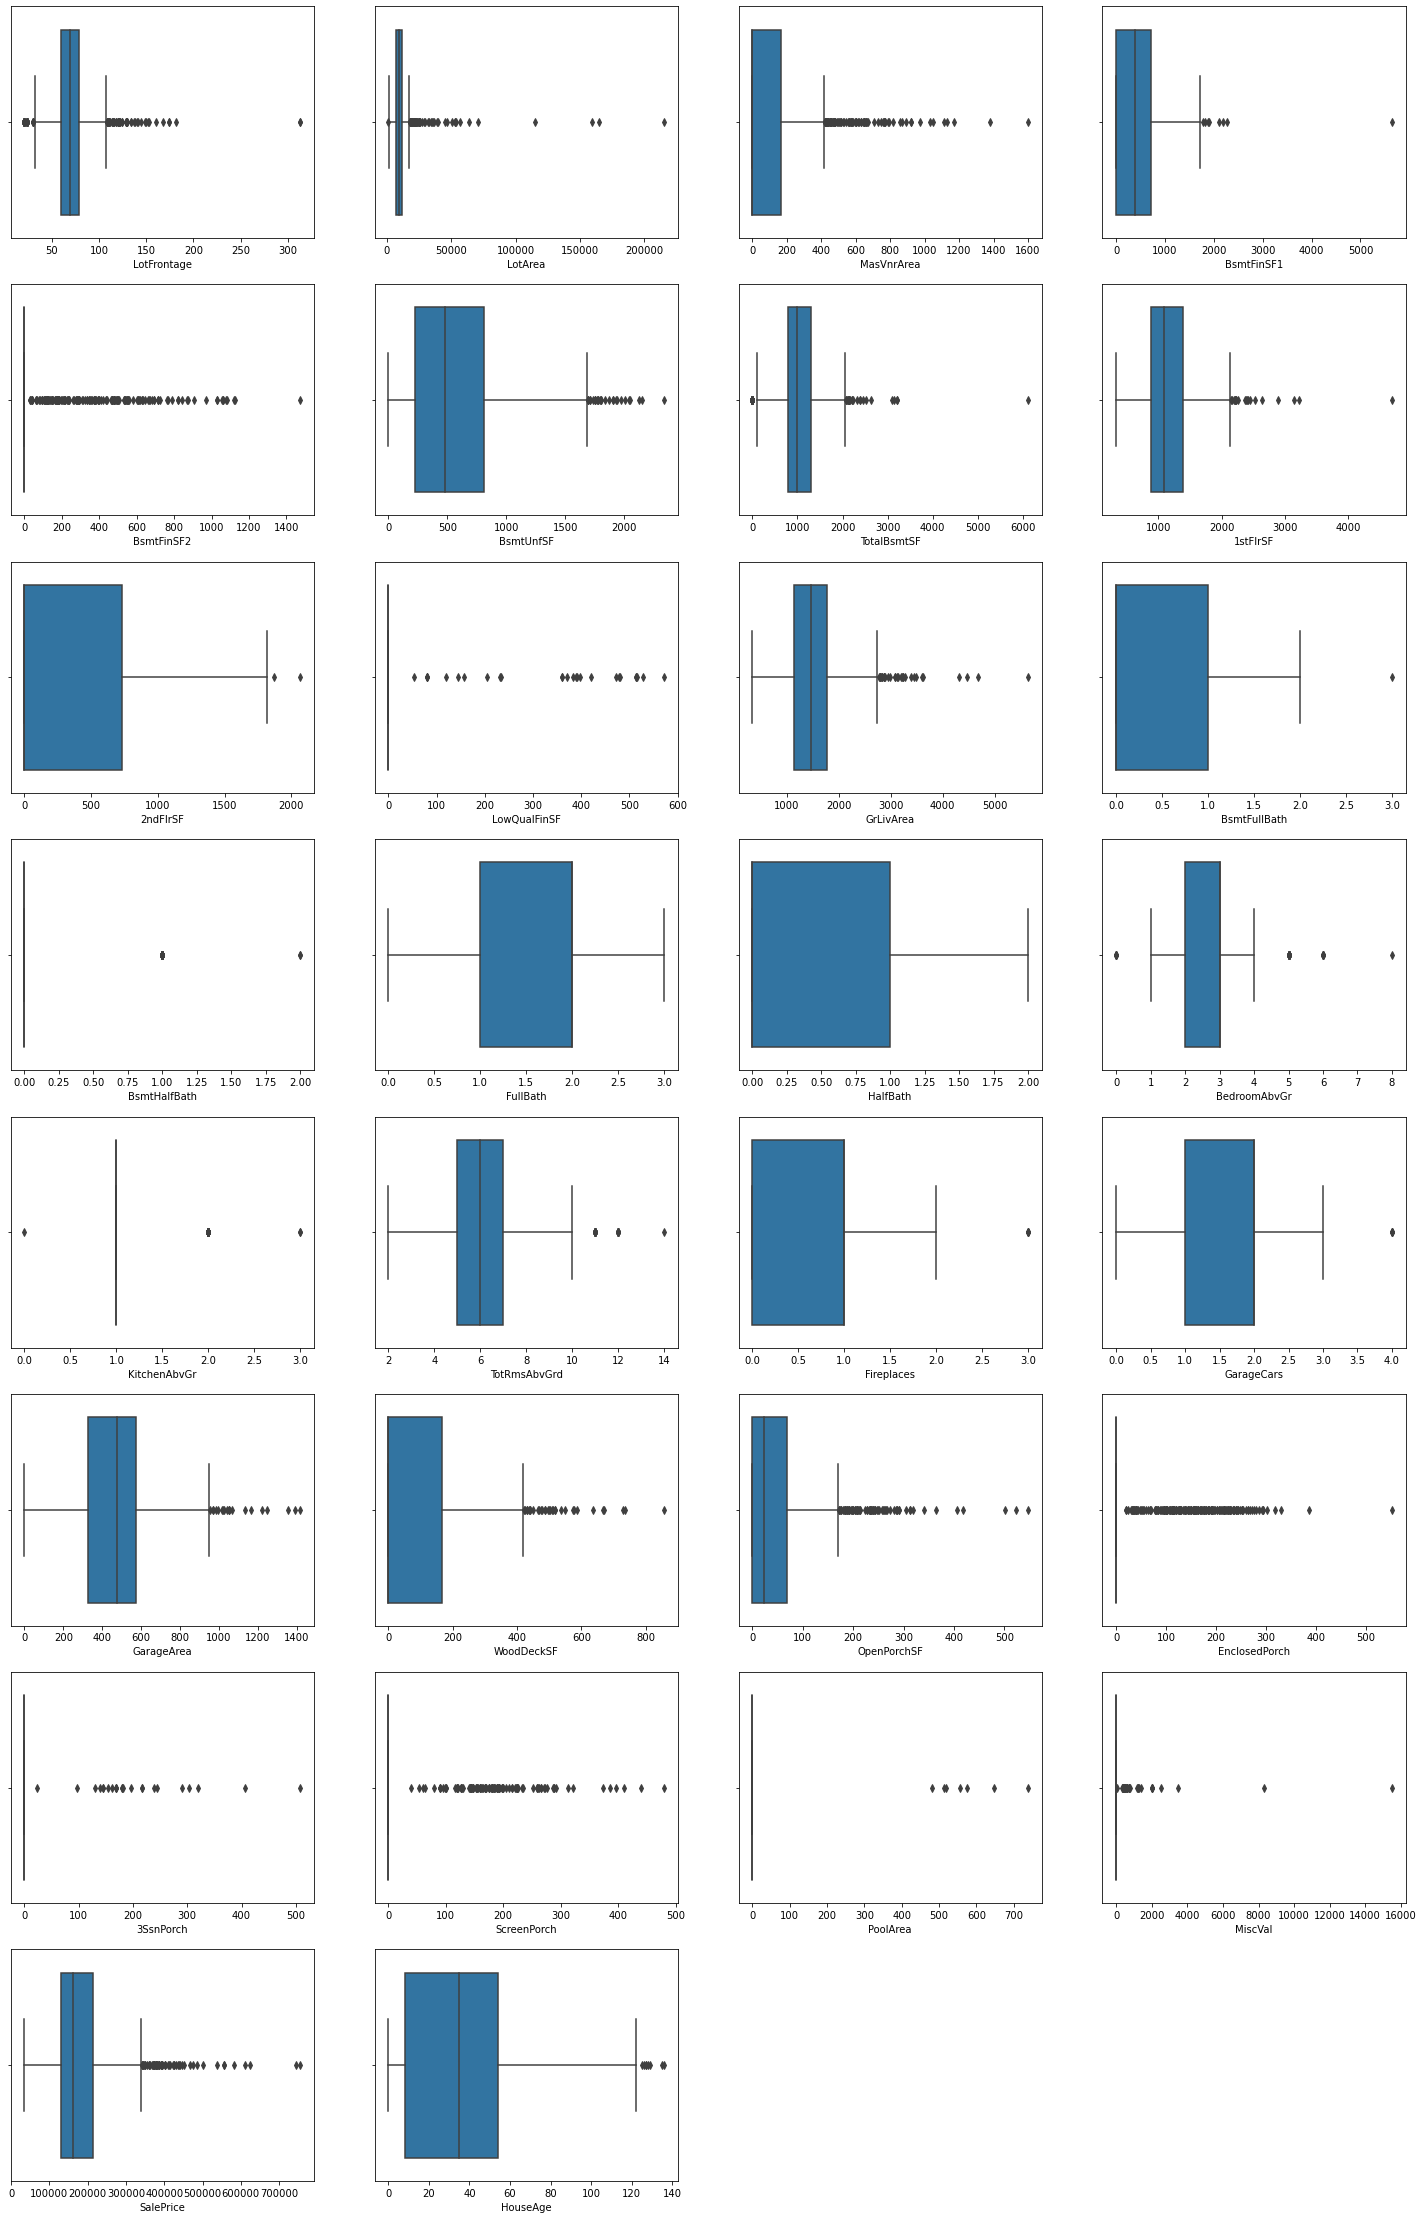

In [24]:
# Box Plotting to see the spread of the numeric columns
plt.figure(figsize=(25,40))
for iterate in enumerate(numericCols):
    plt.subplot(8,4,iterate[0]+1)
    sns.boxplot(x=iterate[1], data=housingdf)

#### Numeric Variables Visualization

- Numerical variables are usually of 2 types.
1. Continous variable
2. Discrete Variables

In [25]:
#Let's Extract discrete numeric variables
discreteFeature=[feature for feature in numericCols if len(housingdf[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discreteFeature)))
discreteFeature

Discrete Variables Count: 13


['LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

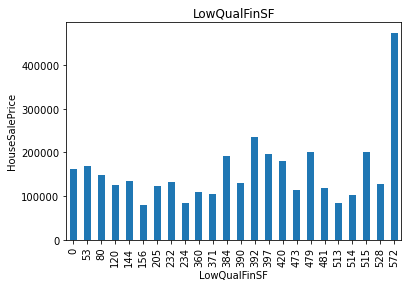

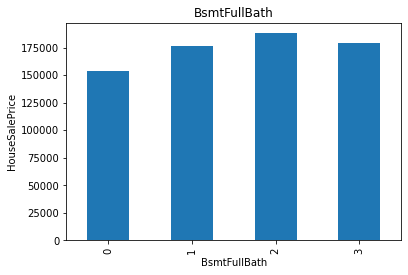

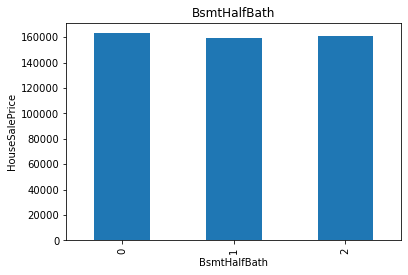

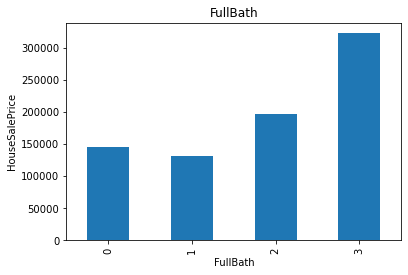

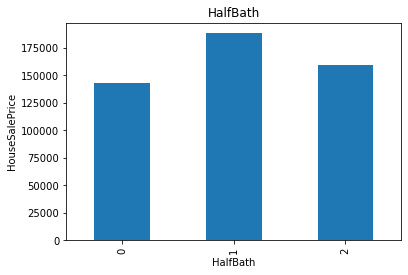

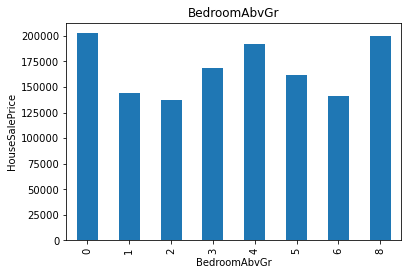

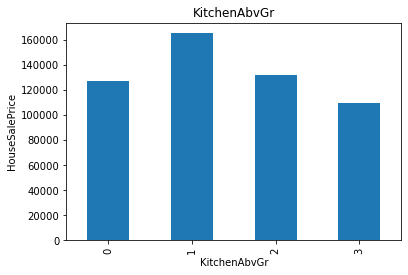

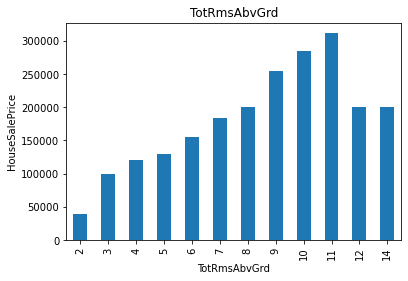

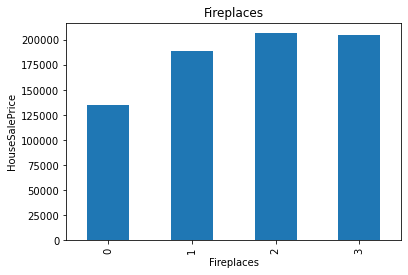

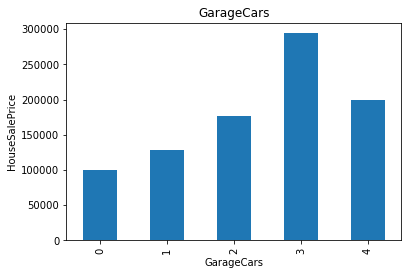

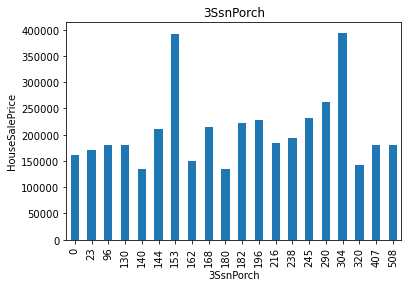

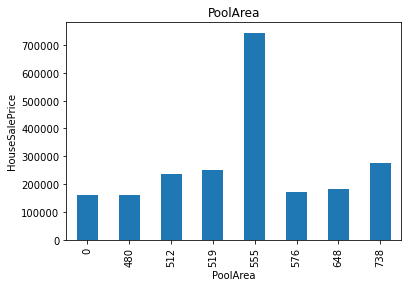

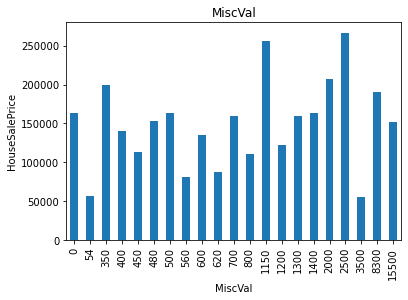

In [26]:
## Visualize the relation between Sale Price and Discrete Numeric variables
for feature in discreteFeature:
    copyOfDf=housingdf.copy()
    copyOfDf.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('HouseSalePrice')
    plt.title(feature)
    plt.show()

### Observations:
- Higher Number of FullBath house tend to have higher price.
- House with 1 kitechenAbvGr tend to have higher price
- House with 10 or 11 TotRmsAbvGrd tend to have higher price
- House with 2-3 Fireplaces have higher price.
-  3 GarageCars house have higher price.
- The favourable pool area for higher sale price house is 555

<h3 style = "color : Brown">Explore and Visualize Categorical Variables</h3>

In [27]:
# List of categorical columns
categoryCols = housingdf.select_dtypes(include='object').columns
categoryCols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
# Inspect Values count for each categorical column
for columnName in list(categoryCols):
    print(housingdf[columnName].value_counts())

20     532
60     296
50     144
120     86
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1146
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1446
Grvl       6
Name: Street, dtype: int64
No Alley    1362
Grvl          50
Pave          40
Name: Alley, dtype: int64
Reg    919
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1303
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1451
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1046
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1374
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     58
BrkSide     58
Crawfor    

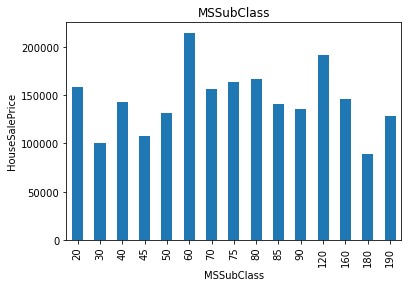

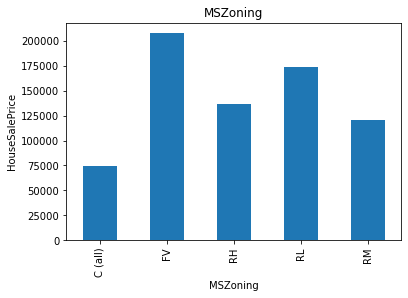

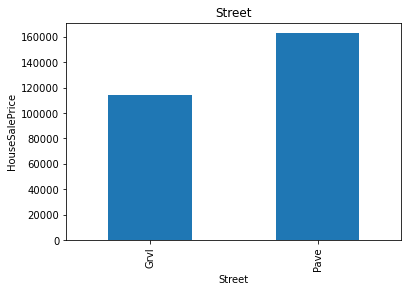

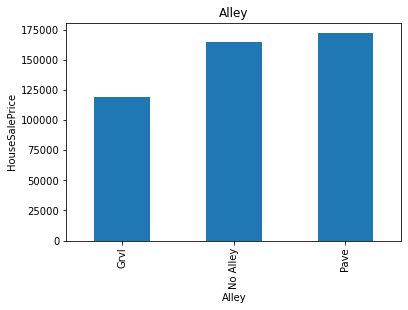

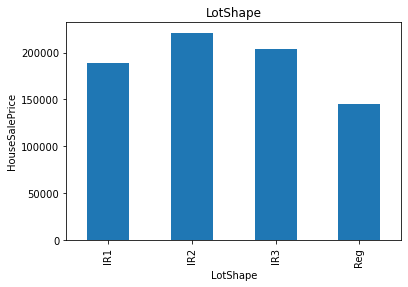

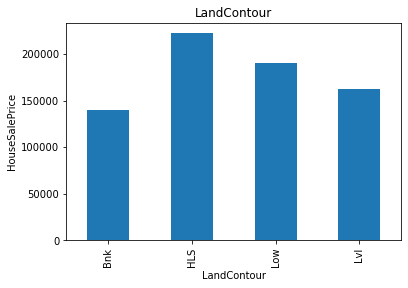

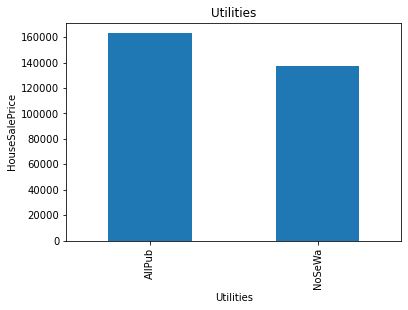

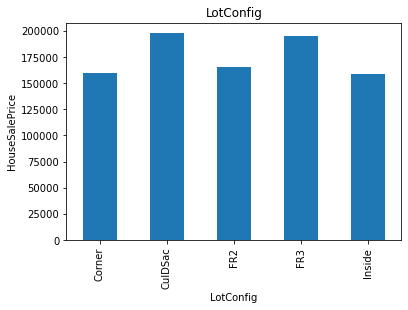

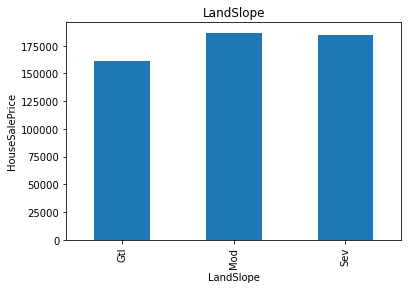

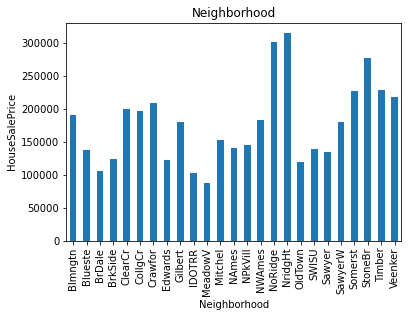

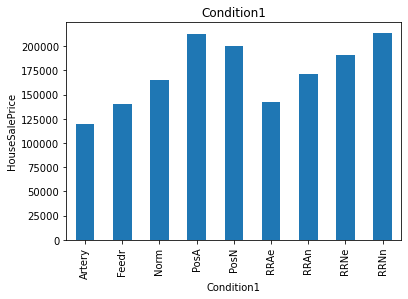

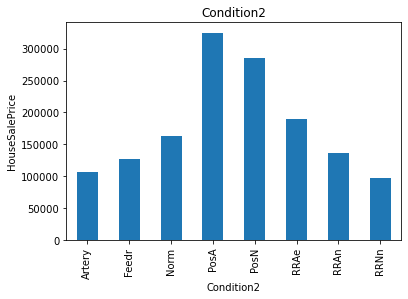

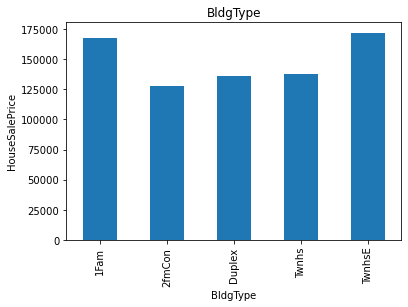

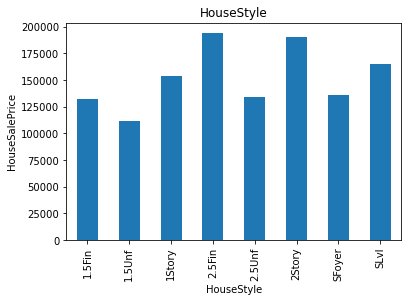

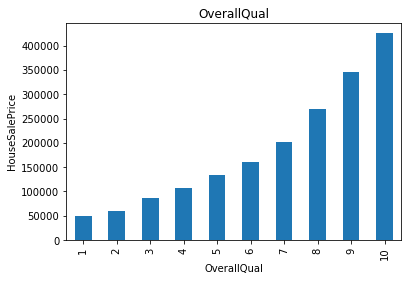

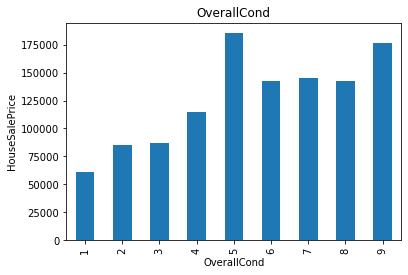

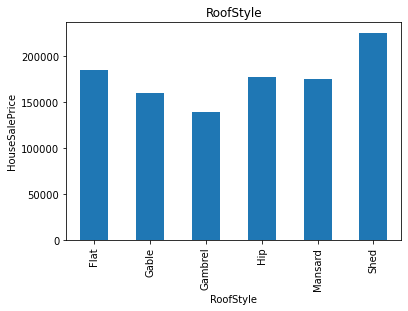

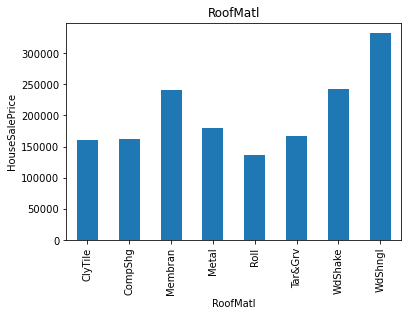

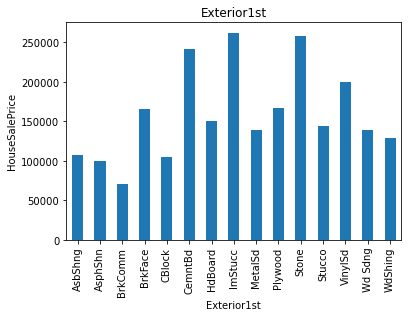

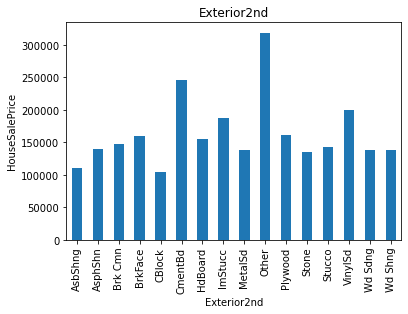

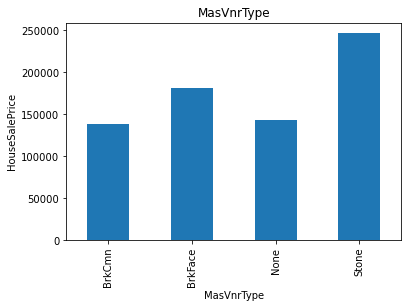

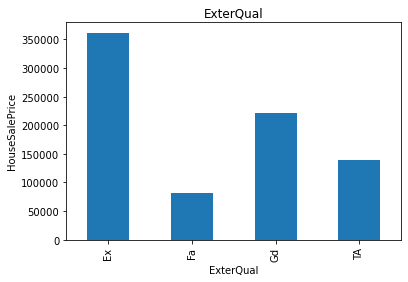

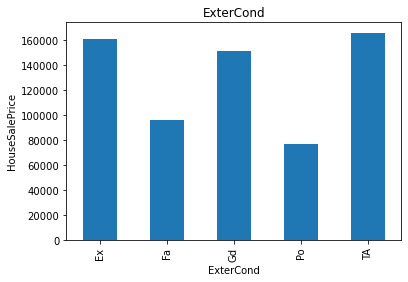

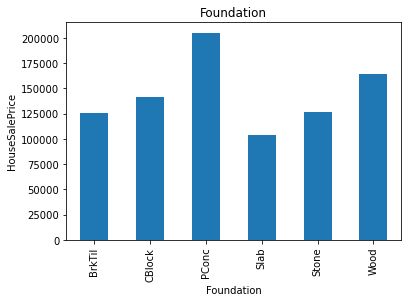

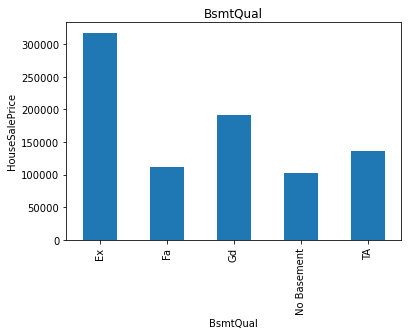

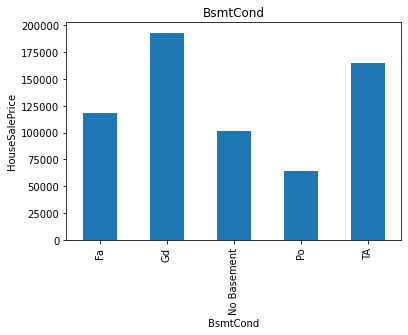

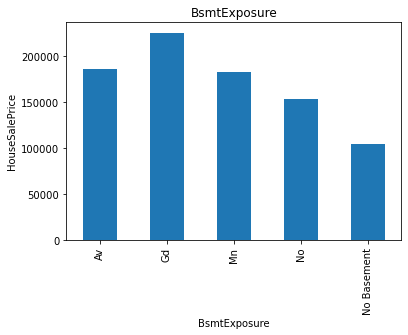

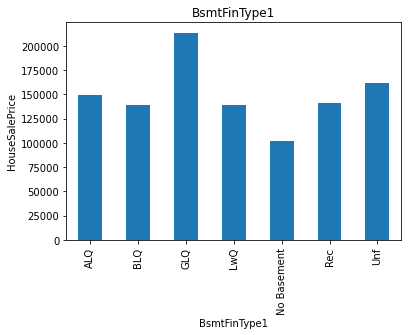

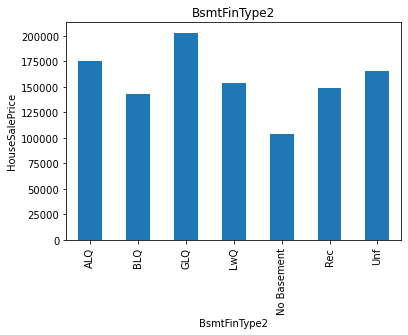

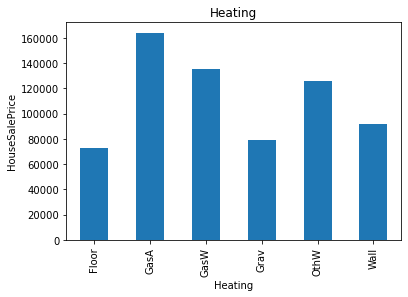

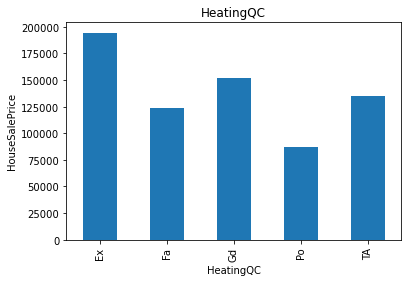

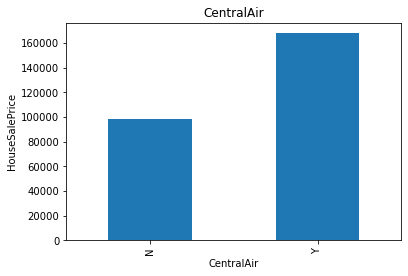

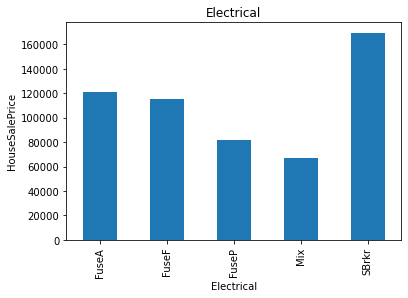

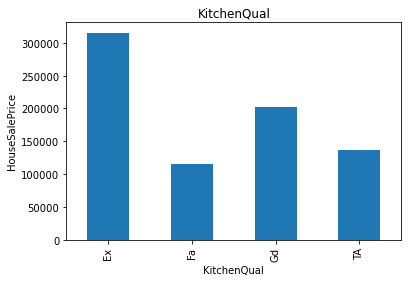

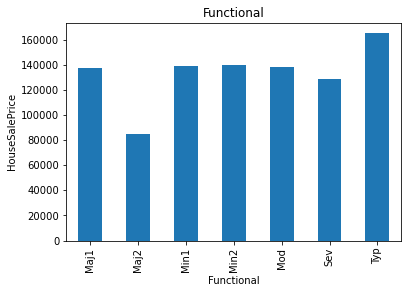

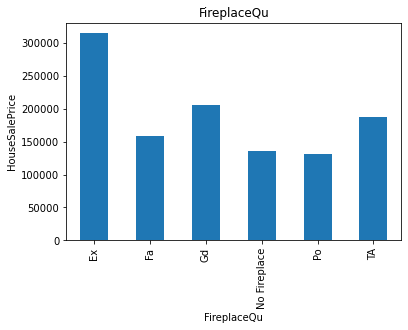

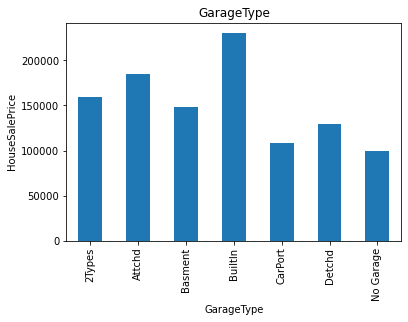

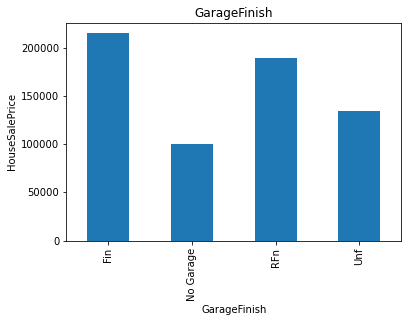

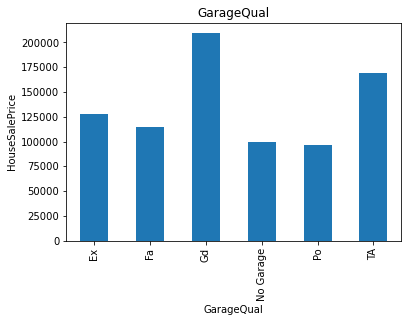

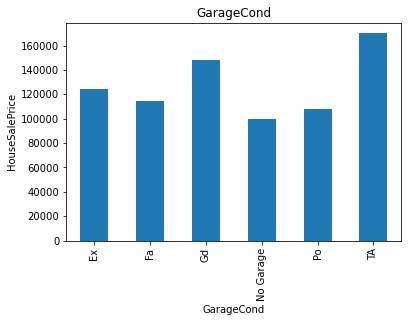

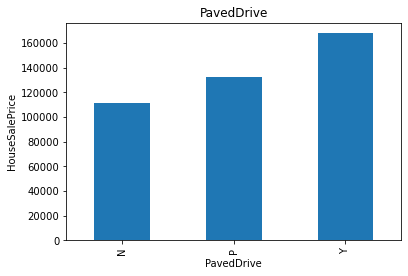

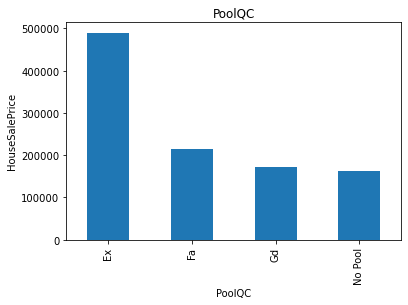

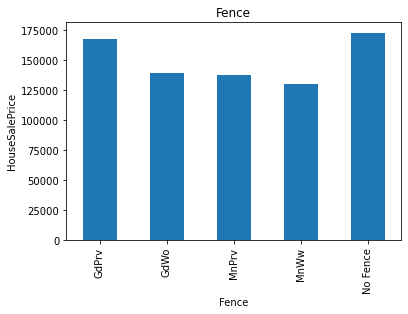

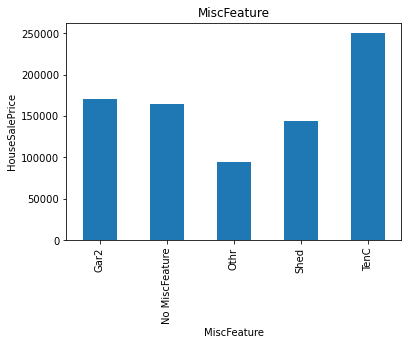

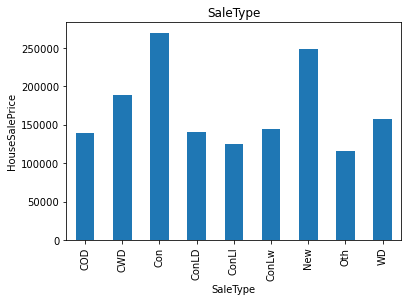

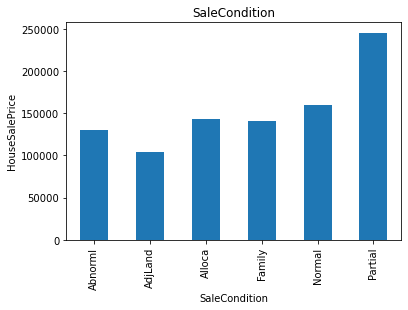

In [29]:
## Visualize the relation between Sale Price and Categorical variables
for feature in categoryCols:
    copyOfDf=housingdf.copy()
    copyOfDf.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('HouseSalePrice')
    plt.title(feature)
    plt.show()

## Observations:
-  MsubClass 60	i.e. 2-STORY 1946 & NEWER house have highest sale prices.
- MSZoning  FV	i.e. Floating Village Residential house have highest sale prices.
- Pave street house have higher sale price
- Pave Alley House have higher sale price
- House on  LandContour with HLS have higher sale price.
- House with neighorhood having NoRidge and Nridght have higher sale price
- Higher OverallQual is increasing the sale price .
- Very good OverallCond also tend to increase the house price.

### Dropping few coulms having very lesser types of values
These column may bring very less variance in the data. Hence it is better to remove these columns.

In [30]:
housingdf.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition2','BldgType','RoofMatl','BsmtCond','Heating',
         'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature','SaleType','ExterCond','BsmtFinType2'],
       axis=1, inplace=True)

<h3 style = "color : Green">Dummy Variables Creation</h3>
1. Creating Category 'Other' for Combined representation of the lower number of value counts.
2. Creating the dummy variables for the categorical variables.
3. Droping the dummy column Other.

In [31]:
housingdf = housingdf.replace({'MSZoning': {'C (all)':'Other', 'RH':'Other', 'FV':'Other'}})
housingdf = housingdf.replace({'LotShape': {'IR2':'Other', 'IR3':'Other'}})
housingdf = housingdf.replace({'LotConfig': {'CulDSac':'Other', 'FR2':'Other', 'FR3':'Other'}})
housingdf = housingdf.replace({'Neighborhood': {'Blueste':'Other', 'NPkVill':'Other', 'Veenker':'Other', 'BrDale':'Other', 'Blmngtn':'Other',
                                 'MeadowV':'Other', 'SWISU':'Other', 'StoneBr':'Other', 'ClearCr':'Other',
                                 'IDOTRR':'Other', 'Timber':'Other', 'NoRidge':'Other', 'Mitchel':'Other'}}) 
housingdf = housingdf.replace({'Condition1': {'RRNe':'Other', 'RRNn':'Other', 'PosA':'Other', 'RRAe':'Other', 'PosN':'Other',
                               'RRAn':'Other', 'Artery':'Other'}})
housingdf = housingdf.replace({'HouseStyle': {'2.5Fin':'Other', '2.5Unf':'Other', '1.5Unf':'Other', 'SFoyer':'Other', 'SLvl':'Other'}})                               
housingdf = housingdf.replace({'OverallQual': {1:'Other', 2:'Other', 10:'Other', 3:'Other', 9:'Other'}}) 
housingdf = housingdf.replace({'OverallCond': {1:'Other', 2:'Other', 9:'Other', 3:'Other', 4:'Other'}})
housingdf = housingdf.replace({'RoofStyle': {'Shed':'Other', 'Mansard':'Other', 'Gambrel':'Other', 'Flat':'Other'}})
housingdf = housingdf.replace({'Exterior1st': {'ImStucc':'Other', 'AsphShn':'Other', 'CBlock':'Other', 'BrkComm':'Other','Stone':'Other',
                              'AsbShng':'Other','Stucco':'Other','WdShing':'Other','BrkFace':'Other','CemntBd':'Other'}})
housingdf = housingdf.replace({'Exterior2nd': {'CBlock':'Other', 'AsphShn':'Other', 'Stone':'Other', 'Brk Cmn':'Other','ImStucc':'Other',
                              'AsbShng':'Other','BrkFace':'Other','Stucco':'Other','Wd Shng':'Other','CmentBd':'Other'}})
housingdf = housingdf.replace({'ExterQual': {'Fa':'Other', 'Ex':'Other'}})
housingdf = housingdf.replace({'Foundation': {'Wood':'Other', 'Stone':'Other','Slab':'Other'}})
housingdf = housingdf.replace({'BsmtQual': {'Fa':'Other', 'No Basement':'Other'}})
housingdf = housingdf.replace({'HeatingQC': {'Fa':'Other', 'Po':'Other'}})
housingdf = housingdf.replace({'KitchenQual': {'Fa':'Other', 'Ex':'Other'}})
housingdf = housingdf.replace({'FireplaceQu': {'Fa':'Other', 'Ex':'Other','Po':'Other'}})
housingdf = housingdf.replace({'GarageType': {'2Types':'Other', 'CarPort':'Other','Basment':'Other'}})
housingdf = housingdf.replace({'Fence': {'MnWw':'Other', 'GdWo':'Other','GdPrv':'Other'}})
housingdf = housingdf.replace({'SaleCondition': {'AdjLand':'Other', 'Alloca':'Other','Family':'Other'}})
housingdf = housingdf.replace({'MSSubClass': {40:'Other', 180:'100',45:'Other', 75:'Other',85:'Other',190:'Other',90:'Other',
                               80:'Other',70:'Other',160:'Other',30:'Other'}})

In [32]:
# Convert categorical value into Dummy variable
housingdf=pd.get_dummies(housingdf,drop_first=True)
housingdf.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_No Garage,GarageType_Other,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,Fence_Other,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,1,0,1,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,1,0,1,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,1,0,1,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,1,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,1,0,1,0,1,0,0


In [33]:
housingdf.shape

(1452, 120)

In [34]:
#Get list of Columns for Other values, to drop them
ColumnsList=housingdf.columns.tolist()
OtherColumnsList=[x for x in ColumnsList if 'Other' in x]
OtherColumnsList

['MSSubClass_Other',
 'LotShape_Other',
 'LotConfig_Other',
 'Neighborhood_Other',
 'Condition1_Other',
 'HouseStyle_Other',
 'OverallQual_Other',
 'OverallCond_Other',
 'RoofStyle_Other',
 'Exterior1st_Other',
 'Exterior2nd_Other',
 'ExterQual_Other',
 'Foundation_Other',
 'BsmtQual_Other',
 'HeatingQC_Other',
 'KitchenQual_Other',
 'FireplaceQu_Other',
 'GarageType_Other',
 'Fence_Other',
 'SaleCondition_Other']

In [35]:
#Dropping columns with Other values
housingdf=housingdf.drop(OtherColumnsList, axis=1)
housingdf.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'HouseAge', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_120', 'MSSubClass_100', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_Reg', 'LotConfig_Inside', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Condition1_Norm', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'OverallQual_5', 'OverallQua

In [36]:
housingdf.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,1,0,1,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,0,0,0,0,1,0,1,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,0,0,0,0,1,0,1,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,1,0,0,0,1,1,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,0,0,0,0,1,0,1,1,0


In [37]:
housingdf.shape

(1452, 100)

We can see that, we have 100 coulmns in the dataset.

<h2 style = "color : Green">Analysing Target Variable</h2>

- Checking distribution of the target column `SalePrice`

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

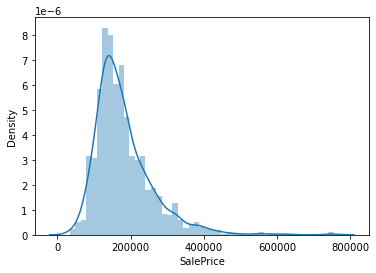

In [38]:
sns.distplot(housingdf['SalePrice'])

In [39]:
# Let's check Skewness of Sale Price
housingdf['SalePrice'].skew()

1.8840445160660748

### Log Transformation to Remove Skewness

In [40]:
#Log Transformation
housingdf['SalePrice']=np.log1p(housingdf['SalePrice'])

0.12195896578646954

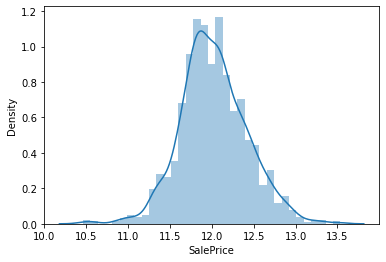

In [41]:
sns.distplot(housingdf['SalePrice'])
# Let's check Skewness of Sale Price
housingdf['SalePrice'].skew()

### We can see that the distribution plot of the SalePrice column is little right skewed.

<h2 style = "color : Brown">Splitting the Data into Train and Test Sets</h2>

## Test-Train Split

In [42]:
# Splitting data into train and test set with 80:20 ratio
df_train, df_test = train_test_split(housingdf, train_size=0.8, test_size=0.2, random_state=100)

In [43]:
print(df_train.shape)
print(df_test.shape)

(1161, 100)
(291, 100)


## Feature Scaling

In [44]:
# Instantiate the scaler
scaler = MinMaxScaler()

In [45]:
# Get Numeric columns
numericCols = list(housingdf.select_dtypes(include=['int64', 'float64']).columns)
print(numericCols)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'HouseAge']


In [46]:
# Fit the data into scaler and transform
df_train[numericCols] = scaler.fit_transform(df_train[numericCols])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,SaleCondition_Normal,SaleCondition_Partial
744,0.068493,0.019140,0.000000,0.129872,0.000000,0.258562,0.218822,0.230151,0.000000,0.0,...,1,0,0,0,0,1,0,1,1,0
1184,0.099315,0.158139,0.141250,0.205351,0.000000,0.176798,0.257283,0.284075,0.000000,0.0,...,1,0,0,0,0,1,0,1,1,0
369,0.164384,0.039870,0.000000,0.012757,0.228926,0.313784,0.173977,0.218678,0.000000,0.0,...,0,0,1,0,0,0,0,1,1,0
627,0.202055,0.038795,0.102500,0.119419,0.117125,0.149829,0.189198,0.272143,0.000000,0.0,...,0,0,0,0,0,1,0,1,1,0
517,0.198630,0.041637,0.575625,0.000000,0.000000,0.541096,0.206874,0.216384,0.516707,0.0,...,1,0,0,0,0,1,0,1,1,0


In [47]:
df_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,SaleCondition_Normal,SaleCondition_Partial
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,...,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,0.167289,0.043499,0.063119,0.078741,0.041621,0.241474,0.172734,0.189769,0.169395,0.011028,...,0.220500,0.064599,0.249785,0.061154,0.061154,0.291128,0.410853,0.807924,0.823428,0.081826
std,0.077643,0.050392,0.111605,0.081680,0.143521,0.187782,0.072941,0.090099,0.210580,0.090085,...,0.414762,0.245924,0.433075,0.239716,0.239716,0.454478,0.492201,0.394102,0.381470,0.274218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.029143,0.000000,0.000000,0.000000,0.093750,0.129787,0.125746,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.164384,0.038290,0.000000,0.068037,0.000000,0.205051,0.162193,0.171179,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.195205,0.047676,0.102500,0.124911,0.000000,0.341610,0.210147,0.240707,0.352542,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Identifying Correlation For Continous Variables.

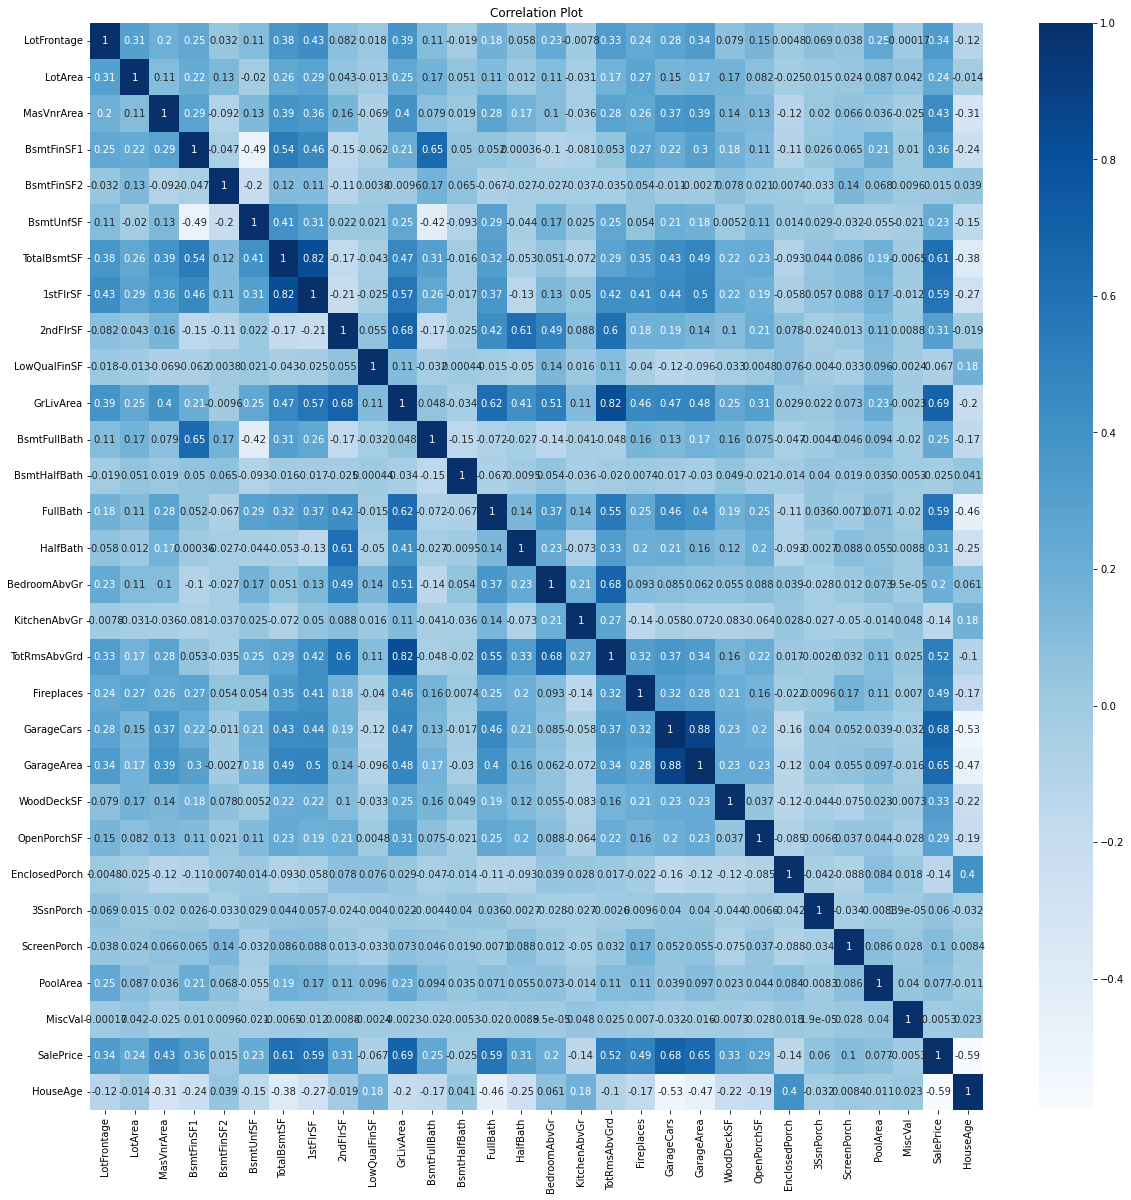

In [48]:
# Let's plot heat map to see correlation between some continous variables
Data_corr = df_train[numericCols].corr()
plt.figure(figsize = (20, 20))
sns.heatmap(Data_corr, cmap="Blues",annot = True)
plt.title("Correlation Plot")
plt.show()

In [49]:
# Variables with more than 0.60 correlations 
tempdf=Data_corr.abs().unstack()
df_corr = pd.DataFrame(tempdf)
print(df_corr[(df_corr[0] < 1) & (df_corr[0] > 0.6)])

                                  0
BsmtFinSF1   BsmtFullBath  0.648606
TotalBsmtSF  1stFlrSF      0.820468
             SalePrice     0.605141
1stFlrSF     TotalBsmtSF   0.820468
2ndFlrSF     GrLivArea     0.677643
             HalfBath      0.614802
             TotRmsAbvGrd  0.604302
GrLivArea    2ndFlrSF      0.677643
             FullBath      0.621798
             TotRmsAbvGrd  0.821100
             SalePrice     0.688572
BsmtFullBath BsmtFinSF1    0.648606
FullBath     GrLivArea     0.621798
HalfBath     2ndFlrSF      0.614802
BedroomAbvGr TotRmsAbvGrd  0.681895
TotRmsAbvGrd 2ndFlrSF      0.604302
             GrLivArea     0.821100
             BedroomAbvGr  0.681895
GarageCars   GarageArea    0.883644
             SalePrice     0.684413
GarageArea   GarageCars    0.883644
             SalePrice     0.651209
SalePrice    TotalBsmtSF   0.605141
             GrLivArea     0.688572
             GarageCars    0.684413
             GarageArea    0.651209


#### Dividing into X and Y sets for the model building

In [50]:
# Pop out the SalePrice column for y_train
y_train = df_train.pop('SalePrice')
# Initialize X_train
X_train = df_train

In [51]:
y_train.head()

744     0.535941
1184    0.547881
369     0.501520
627     0.482846
517     0.662301
Name: SalePrice, dtype: float64

In [52]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,SaleCondition_Normal,SaleCondition_Partial
744,0.068493,0.019140,0.000000,0.129872,0.000000,0.258562,0.218822,0.230151,0.000000,0.0,...,1,0,0,0,0,1,0,1,1,0
1184,0.099315,0.158139,0.141250,0.205351,0.000000,0.176798,0.257283,0.284075,0.000000,0.0,...,1,0,0,0,0,1,0,1,1,0
369,0.164384,0.039870,0.000000,0.012757,0.228926,0.313784,0.173977,0.218678,0.000000,0.0,...,0,0,1,0,0,0,0,1,1,0
627,0.202055,0.038795,0.102500,0.119419,0.117125,0.149829,0.189198,0.272143,0.000000,0.0,...,0,0,0,0,0,1,0,1,1,0
517,0.198630,0.041637,0.575625,0.000000,0.000000,0.541096,0.206874,0.216384,0.516707,0.0,...,1,0,0,0,0,1,0,1,1,0


<h2 style = "color : Brown">Building the model</h2>
First Fit a regression line through the training data using sklearn and Recursive Feature Elimination.

<h3 style = "color : Blue">Normal Regression without Regularisation</h3>

In [53]:
#import Lib
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

#### Function to Print various Evaluation Metrics on Provided data

In [54]:
#import libraries for Metrics evalution
from sklearn.metrics import r2_score, mean_squared_error

def printMetrices(y,y_pred,dataset_type="Train"):
    metric = []
    r2_lr =metrics.r2_score(y, y_pred)
    print(dataset_type," R2 Score: ",r2_lr)
    metric.append(r2_lr)
    # RSS 
    rss1_lr = np.sum(np.square(y - y_pred))
    print(dataset_type," - RSS:",rss1_lr)
    metric.append(rss1_lr)
    #MSE
    mse_lr = mean_squared_error(y,y_pred)
    print(dataset_type," - MSE : ",mse_lr)
    metric.append(mse_lr**0.5)
    return metric
    

#### Start building Model

In [55]:
#Initializing
lm = LinearRegression()
# Training Model
lm.fit(X_train, y_train)

LinearRegression()

In [56]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

0.2738396492502285
[-1.91593536e-02  1.05145760e-01  1.03468551e-03  2.19619192e+11
  4.38537968e+10  9.08983756e+10 -2.37752173e+11 -2.85829729e+10
 -1.35437905e+10 -3.37774920e+09  3.48137724e+10  6.28242493e-02
  1.53255463e-02  4.99954224e-02  1.73263550e-02 -3.35693359e-04
 -8.11033249e-02  5.74340820e-02  1.71957016e-02  9.81674194e-02
 -1.47457123e-02  3.13749313e-02  0.00000000e+00  3.76558304e-02
  3.62962484e-02  3.78713608e-02 -9.44638252e-02  8.37683678e-03
 -1.12899780e-01  1.39999390e-03 -9.93347168e-03 -7.94982910e-03
 -3.14717293e-02  3.15604210e-02  4.68158722e-03 -4.31060791e-03
 -8.20922852e-03  2.36749649e-03  5.31291962e-02 -3.58943939e-02
 -1.01394653e-02 -4.38690186e-04 -4.57763672e-04  4.71992493e-02
  3.98254395e-03 -8.69369507e-03  3.10897827e-04  4.54874039e-02
  1.87530518e-02  6.45446777e-03 -1.12304688e-02  2.40325928e-03
  7.14111328e-03  1.46484375e-02  3.41901779e-02  1.88903809e-02
  3.94182205e-02  4.08115387e-02  1.08432770e-02  4.96244431e-03
 -3.49

In [57]:
# Predict the model with train set
y_train_pred = lm.predict(X_train)

In [58]:
LR_Train=printMetrices(y_train,y_train_pred,"Train")
print(LR_Train)

Train  R2 Score:  0.8712685268167115
Train  - RSS: 2.495046953195992
Train  - MSE :  0.002149049916620148
[0.8712685268167115, 2.495046953195992, 0.04635784633285015]


<h3 style = "color : Blue">Transforming the test Data</h3>

#### Applying the scaling on the test sets

In [59]:
df_test[numericCols] = scaler.transform(df_test[numericCols]) 
df_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,SaleCondition_Normal,SaleCondition_Partial
157,0.243151,0.050027,0.052500,0.000000,0.0,0.331336,0.126678,0.100964,0.578208,0.0,...,0,1,0,0,0,0,0,1,0,1
337,0.167808,0.036622,0.070625,0.143515,0.0,0.310788,0.251391,0.275815,0.000000,0.0,...,0,0,0,0,0,1,0,1,1,0
1120,0.130137,0.032546,0.000000,0.000000,0.0,0.433219,0.165630,0.155576,0.000000,0.0,...,0,0,1,0,0,0,1,0,1,0
563,0.154110,0.095726,0.000000,0.000000,0.0,0.497860,0.190344,0.190225,0.247458,0.0,...,0,0,1,0,0,0,0,1,1,0
371,0.202055,0.073944,0.000000,0.000000,0.0,0.000000,0.000000,0.180358,0.226634,0.0,...,0,0,1,0,0,0,0,1,1,0


In [60]:
df_test.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,SaleCondition_Normal,SaleCondition_Partial
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,...,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,0.167279,0.041188,0.071523,0.076580,0.041173,0.247857,0.173095,0.190062,0.162494,0.012938,...,0.189003,0.041237,0.333333,0.034364,0.034364,0.274914,0.439863,0.800687,0.817869,0.092784
std,0.066211,0.027326,0.119153,0.076675,0.143672,0.195236,0.066664,0.081127,0.214512,0.111258,...,0.392186,0.199181,0.472217,0.182477,0.182477,0.447240,0.497225,0.400172,0.386617,0.290629
min,0.000000,0.001776,0.000000,0.000000,0.000000,0.000000,0.000000,0.008720,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.029300,0.000000,0.000000,0.000000,0.102740,0.132570,0.124943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.164384,0.037743,0.000000,0.066797,0.000000,0.199058,0.162029,0.174851,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.200342,0.049506,0.105937,0.129607,0.000000,0.361087,0.219640,0.251033,0.345036,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,0.452055,0.324668,0.731250,0.304926,1.307897,0.907962,0.400000,0.484167,0.906538,1.110680,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 #### Dividing into X and Y sets for the model evaluation

In [61]:
#Pop out the SalePrice 
y_test = df_test.pop('SalePrice')
# Initialize X_test
X_test = df_test

##### We will keep same columns of X_train,  in the `train set`

In [62]:
# Retaining the columns of X_train to X_test
X_test = X_test[X_train.columns]
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,SaleCondition_Normal,SaleCondition_Partial
157,0.243151,0.050027,0.052500,0.000000,0.0,0.331336,0.126678,0.100964,0.578208,0.0,...,0,1,0,0,0,0,0,1,0,1
337,0.167808,0.036622,0.070625,0.143515,0.0,0.310788,0.251391,0.275815,0.000000,0.0,...,0,0,0,0,0,1,0,1,1,0
1120,0.130137,0.032546,0.000000,0.000000,0.0,0.433219,0.165630,0.155576,0.000000,0.0,...,0,0,1,0,0,0,1,0,1,0
563,0.154110,0.095726,0.000000,0.000000,0.0,0.497860,0.190344,0.190225,0.247458,0.0,...,0,0,1,0,0,0,0,1,1,0
371,0.202055,0.073944,0.000000,0.000000,0.0,0.000000,0.000000,0.180358,0.226634,0.0,...,0,0,1,0,0,0,0,1,1,0


In [63]:
# Predict the model with test set
y_pred_test = lm.predict(X_test)

In [64]:
#r2score,RSS and RMSE
LR_Test=printMetrices(y_test,y_pred_test,"Test")

Test  R2 Score:  0.8702601398333722
Test  - RSS: 0.6899395346092988
Test  - MSE :  0.0023709262357707863


<h3 style = "color : Blue">Selecting Features using RFE. We have selected here 30 features</h3>

In [65]:
rfe = RFE(lm, 30,step=1)            
rfe = rfe.fit(X_train, y_train)

In [66]:
#Checking support for features
rfe.support_

array([False,  True, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True])

In [67]:
#Checking Ranking
rfe.ranking_

array([38,  1, 64,  1, 23,  7, 21,  1,  1, 16,  1,  1,  1,  1, 14, 67,  1,
        1,  1,  1, 20,  1, 70,  1,  1,  1,  1,  2,  1, 60, 11, 39,  1,  1,
       51, 52, 19, 66,  1,  1, 18, 62, 63,  1, 55, 34, 69,  1,  4, 40, 33,
       57, 45,  9,  1,  6,  1,  1, 17, 46, 56, 32, 36, 58, 49, 30, 35, 26,
       24, 25, 54, 53,  3, 10, 37,  5, 41, 42, 29, 68, 28, 50,  1, 65,  8,
       59, 15, 44, 27, 47, 31, 48, 13, 22, 43, 12, 61,  1,  1])

In [68]:
#Combining and Checking Support and Ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 38),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 64),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 23),
 ('BsmtUnfSF', False, 7),
 ('TotalBsmtSF', False, 21),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 16),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', False, 14),
 ('BedroomAbvGr', False, 67),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 20),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 70),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 2),
 ('HouseAge', True, 1),
 ('MSSubClass_50', False, 60),
 ('MSSubClass_60', False, 11),
 ('MSSubClass_120', False, 39),
 ('MSSubClass_100', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', False, 51),
 ('LotShape_Reg', False, 52),
 ('LotConfig_Insid

In [69]:
#Retrieving supported Features data Set
col = X_train.columns[rfe.support_]

In [70]:
X_train_rfe=X_train[col]
X_train_rfe.head()

,LotArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,KitchenAbvGr,TotRmsAbvGrd,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_NridgHt,Neighborhood_Somerst,OverallQual_8,OverallCond_7,OverallCond_8,BsmtFinType1_No Basement,SaleCondition_Normal,SaleCondition_Partial
744,0.019140,0.129872,0.230151,0.000000,0.188960,0.333333,0.0,0.666667,0.333333,0.250000,...,0,0,0,0,1,0,0,0,1,0
1184,0.158139,0.205351,0.284075,0.000000,0.233233,0.333333,0.0,0.333333,0.333333,0.250000,...,0,0,0,0,0,0,0,0,1,0
369,0.039870,0.012757,0.218678,0.000000,0.179540,0.333333,0.0,0.333333,0.333333,0.416667,...,0,0,0,0,0,1,0,0,1,0
627,0.038795,0.119419,0.272143,0.000000,0.223436,0.333333,0.0,0.333333,0.333333,0.416667,...,0,0,0,0,0,0,0,0,1,0
517,0.041637,0.000000,0.216384,0.516707,0.378674,0.000000,0.0,0.666667,0.333333,0.416667,...,0,0,0,0,0,0,0,0,1,0


In [71]:
#Predict the Train Data with RFE
y_pred_train = rfe.predict(X_train)

In [72]:
#r2score,RSS and RMSE
RFE_Train=printMetrices(y_train,y_pred_train,"RFE-Train")

RFE-Train  R2 Score:  0.8461878653468271
RFE-Train  - RSS: 2.981155178614009
RFE-Train  - MSE :  0.002567747785197252


In [73]:
#Predict the Test Data with RFE
y_pred_test = rfe.predict(X_test)
#r2score,RSS and RMSE
RFE_Test=printMetrices(y_test,y_pred_test,"RFE-Test")

RFE-Test  R2 Score:  0.8529373371193297
RFE-Test  - RSS: 0.7820599240355354
RFE-Test  - MSE :  0.002687491147888438


<h1 style = "color : Brown">Ridge and Lasso Regression</h1>

<h2 style = "color : Green">Ridge Regression</h2>

In [74]:
# Import Ridge regression module, Grid Serach CV and KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [75]:
# Specify the range of tuning parameter (alpha) to Tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}


In [76]:
#Ridge regression
ridge = Ridge()

In [77]:
# Cross validation with 5 folds
folds = 5
ridgeModelCrossVal = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

In [78]:
# Fitting the model with train set
ridgeModelCrossVal.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [79]:
# creating dataframe with model_ridge results
ridge_results = pd.DataFrame(ridgeModelCrossVal.cv_results_)
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004800,0.003919,0.001602,0.003203,0.0001,{'alpha': 0.0001},0.753978,0.797781,0.860291,0.834184,...,0.825446,0.045276,16,0.863607,0.854294,0.839877,0.846858,0.836271,0.848181,0.009878
1,0.006398,0.003199,0.001600,0.003200,0.001,{'alpha': 0.001},0.754032,0.797807,0.860306,0.834200,...,0.825468,0.045257,15,0.863606,0.854294,0.839877,0.846858,0.836271,0.848181,0.009878
2,0.001626,0.003251,0.001600,0.003199,0.01,{'alpha': 0.01},0.754467,0.798043,0.860428,0.834322,...,0.825641,0.045103,14,0.863601,0.854292,0.839875,0.846854,0.836270,0.848178,0.009877
3,0.007849,0.006987,0.002162,0.003115,0.05,{'alpha': 0.05},0.755731,0.798832,0.860708,0.834557,...,0.826114,0.044610,13,0.863568,0.854268,0.839856,0.846821,0.836260,0.848155,0.009870
4,0.001600,0.003200,0.006400,0.003200,0.1,{'alpha': 0.1},0.757017,0.799612,0.860854,0.834652,...,0.826525,0.044074,12,0.863531,0.854228,0.839823,0.846781,0.836239,0.848120,0.009865


<h3 style = "color : Green">Visualizing the train and test results : Ridge</h3>

In [80]:
# Converting the 'param_alpha' datatype from object to int
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

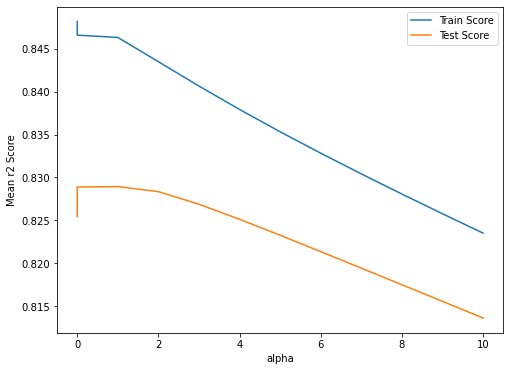

In [81]:
# Plotting Train Score- Mean Value Vs Test score - Mean Value
plt.figure(figsize=(8,6))

plt.xlabel('alpha')
plt.ylabel('Mean r2 Score')

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])

plt.legend(['Train Score', 'Test Score'])
plt.show()

# Observations
***Train Score***

- As the alpha (lambda) increases, the r2 score decreases. 
- With the increase in alpha, model becomes more generalised and simple. Hence, the error increases.

***Test Score***

- With the increasing value of alpha, the error started decreasing more and it reached to a peak at alph=1. 
- After alpha=1, the r2 score started decreasing as the alpha is increasing. Hence, the model accuracy started dipping.


In [82]:
print(ridgeModelCrossVal.best_params_)
print(ridgeModelCrossVal.best_score_)

{'alpha': 1.0}
0.82893620442954


##### For Ridge The optimal value of Alpha is 1

In [83]:
# Instantiate Ridge regression with alpha=1
model_ridge = Ridge(alpha=1)
# Fitting the model with the RFE train set
model_ridge.fit(X_train_rfe, y_train)

Ridge(alpha=1)

<h3 style = "color : Green"> Model evaluation Ridge Regression</h3>

##### Model performance on the train set

In [84]:
y_train_pred = model_ridge.predict(X_train_rfe)

#r2score,RSS and RMSE
Ridge_Train=printMetrices(y_train,y_train_pred,"RIDGE-Train")

RIDGE-Train  R2 Score:  0.8449825786068897
RIDGE-Train  - RSS: 3.0045157984674495
RIDGE-Train  - MSE :  0.0025878689047953915


##### Model performance on the test set

In [85]:
X_test_rfe=X_test[col]

y_test_pred = model_ridge.predict(X_test_rfe)

#r2score,RSS and RMSE
Ridge_Test=printMetrices(y_test,y_test_pred,"RIDGE-Test")

RIDGE-Test  R2 Score:  0.8549579125067409
RIDGE-Test  - RSS: 0.7713147695344973
RIDGE-Test  - MSE :  0.002650566218331606


#### Conclusion

##### We have a good train score 84.4% and good test score as well 85.4%. That means what the model learnt in the train set it performed well in the test set.

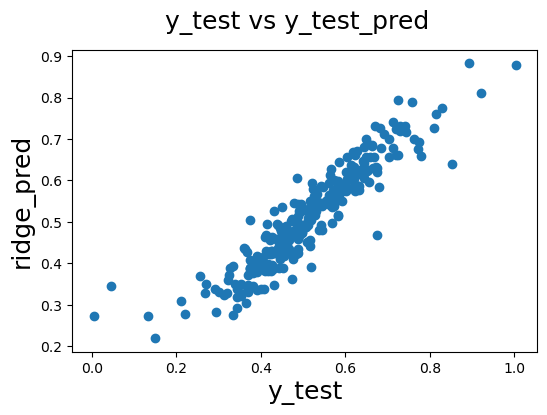

In [86]:
# Plotting y_test and y_test_pred 
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=18)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=18)  
plt.show()

#### Distribution of errors

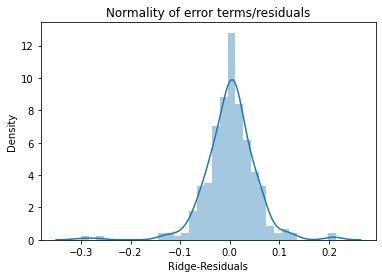

In [87]:
y_residuals=y_test-y_test_pred

sns.distplot(y_residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Ridge-Residuals")
plt.show()

<h2 style = "color : Brown">Lasso Regression</h2>

In [88]:
# Importing Lasso module
from sklearn.linear_model import Lasso

In [89]:
# Specify the range of tuning parameter (alpha) to Tune
params = {'alpha': [0.0005, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

In [90]:
#Lasso regression
lasso = Lasso()

In [91]:
# Cross validation with 5 folds
lassModelCrossVal = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

In [92]:
# Fitting the model with train set
lassModelCrossVal.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0005, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [93]:
# creating dataframe with lassModelCrossVal results
lasso_results = pd.DataFrame(lassModelCrossVal.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007992,0.000015,0.000000,0.000000,0.0005,{'alpha': 0.0005},0.771595,0.800253,0.837611,0.820544,...,0.815542,0.027247,1,0.848201,0.837276,0.823598,0.829089,0.820564,0.831746,0.009998
1,0.004800,0.003919,0.000000,0.000000,0.001,{'alpha': 0.001},0.778936,0.788479,0.818564,0.799793,...,0.800878,0.015899,2,0.825720,0.819405,0.806623,0.813008,0.803979,0.813747,0.008026
2,0.001642,0.003284,0.000000,0.000000,0.01,{'alpha': 0.01},0.391224,0.415099,0.368854,0.387563,...,0.388004,0.015662,3,0.374242,0.409033,0.383505,0.409018,0.399252,0.395010,0.013961
3,0.000000,0.000000,0.003124,0.006248,0.05,{'alpha': 0.05},-0.001110,-0.004108,-0.003492,-0.007789,...,-0.003838,0.002216,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002102,0.004204,0.004220,0.006072,0.1,{'alpha': 0.1},-0.001110,-0.004108,-0.003492,-0.007789,...,-0.003838,0.002216,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [94]:
print(lassModelCrossVal.best_params_)
print(lassModelCrossVal.best_score_)

{'alpha': 0.0005}
0.8155421483094664


##### Lasso regression with optimal alpha 0.0005

In [95]:
# Instantiate Lasso regression with alpha=0.0005
model_lasso = Lasso(0.0005)
# Fitting the model with the train set
model_lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.0005)

<h3 style = "color : Green">Model evaluation Lasso Regression</h3>

##### Model performance on the train set

In [96]:
y_train_pred = model_lasso.predict(X_train_rfe)

#r2score,RSS and RMSE
Lasso_Train=printMetrices(y_train,y_train_pred,"LASSO-Train")

LASSO-Train  R2 Score:  0.8297149180823479
LASSO-Train  - RSS: 3.300430456570921
LASSO-Train  - MSE :  0.00284274802460889


##### Model performance on the test set

In [97]:
y_test_pred = model_lasso.predict(X_test_rfe)

#r2score,RSS and RMSE
Lasso_Test=printMetrices(y_test,y_test_pred,"LASSO-Test")

LASSO-Test  R2 Score:  0.8409271155032693
LASSO-Test  - RSS: 0.8459287050076822
LASSO-Test  - MSE :  0.0029069714948717603


#### Conclusion

We have train set accuracy 83.0% whereas test set accuracy is 84.1%.

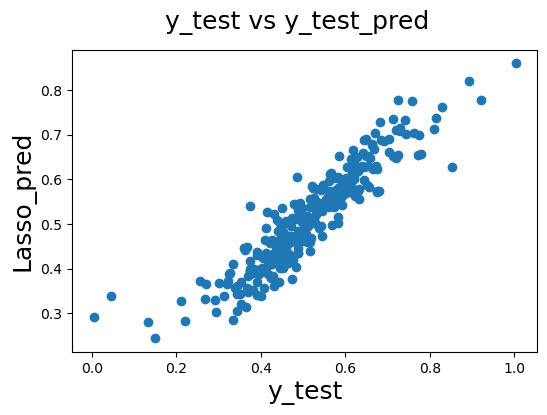

In [98]:
# Plotting y_test and y_test_pred 
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=18)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('Lasso_pred', fontsize=18)  
plt.show()

#### Distribution of errors

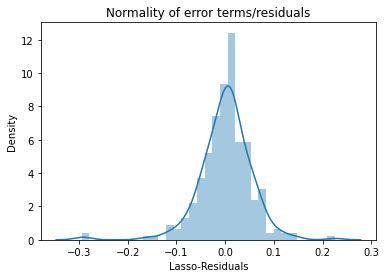

In [99]:
y_residuals=y_test-y_test_pred

sns.distplot(y_residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Lasso-Residuals")
plt.show()

<h3 style = "color : Brown">How well different Models describe the price of a house</h3>

In [100]:
# Creating a table for comparison
lr_table = {'Metric': ['R2 Score (Train)','RSS (Train)','MSE (Train)','R2 Score (Test)','RSS (Test)','MSE (Test)']}
Index = pd.DataFrame(lr_table ,columns = ['Metric'] )
lr_metric = pd.Series(LR_Train+LR_Test, name = 'Linear Regression')
rfe_metric = pd.Series(RFE_Train+RFE_Test, name = 'RFE Linear Regression')
rg_metric = pd.Series(Ridge_Train+Ridge_Test, name = 'Ridge Regression')
ls_metric = pd.Series(Lasso_Train+Lasso_Test, name = 'Lasso Regression')

finalTable = pd.concat([Index,lr_metric,rfe_metric, rg_metric, ls_metric], axis = 1)
finalTable

,Metric,Linear Regression,RFE Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.871269,0.846188,0.844983,0.829715
1,RSS (Train),2.495047,2.981155,3.004516,3.300430
2,MSE (Train),0.046358,0.050673,0.050871,0.053317
3,R2 Score (Test),0.870260,0.852937,0.854958,0.840927
4,RSS (Test),0.689940,0.782060,0.771315,0.845929
5,MSE (Test),0.048692,0.051841,0.051484,0.053916


<h3 style = "color : Brown">Changes in the coefficients after regularization</h3>

In [101]:
coef_df = pd.DataFrame(index=X_train_rfe.columns)
coef_df.rows = X_train_rfe.columns
#coef_df['LinearRegression'] = lm.coef_
coef_df['Ridge'] = model_ridge.coef_
coef_df['Lasso'] = model_lasso.coef_
coef_df['abs_value_coeff']= abs (coef_df['Lasso'])
coef_df.sort_values('abs_value_coeff', ascending=False)


,Ridge,Lasso,abs_value_coeff
GrLivArea,0.201700,0.422504,0.422504
HouseAge,-0.155314,-0.146900,0.146900
GarageCars,0.114691,0.130996,0.130996
BsmtFullBath,0.073587,0.066649,0.066649
BsmtFinType1_No Basement,-0.059422,-0.060152,0.060152
Fireplaces,0.042051,0.057910,0.057910
1stFlrSF,0.217440,0.050685,0.050685
Neighborhood_NridgHt,0.053596,0.048736,0.048736
FullBath,0.058470,0.047505,0.047505
Neighborhood_Crawfor,0.060031,0.045993,0.045993


<h3 style = "color : Brown">Ridge Vs Lasso :Which is better!</h3>

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [102]:
#import Lib
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Define function to check VIF in Train set
def checkVIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [103]:
checkVIF(X_train_rfe)

                    Features     VIF
4                  GrLivArea  861.70
2                   1stFlrSF  442.62
3                   2ndFlrSF  161.49
9               TotRmsAbvGrd   33.45
8               KitchenAbvGr   23.77
7                   FullBath   19.71
11                GarageCars   11.54
28      SaleCondition_Normal    8.49
19               MSZoning_RL    6.80
17                  HouseAge    6.01
1                 BsmtFinSF1    4.44
5               BsmtFullBath    3.34
10                Fireplaces    2.95
0                    LotArea    2.12
29     SaleCondition_Partial    2.12
12                WoodDeckSF    1.90
23      Neighborhood_Somerst    1.49
13             EnclosedPorch    1.45
24             OverallQual_8    1.38
25             OverallCond_7    1.36
22      Neighborhood_NridgHt    1.33
21      Neighborhood_Edwards    1.24
26             OverallCond_8    1.19
6               BsmtHalfBath    1.18
27  BsmtFinType1_No Basement    1.17
15               ScreenPorch    1.17
1

### Let's Check Features Eliminated by Lasso


In [104]:
FeaturesToEliminate=coef_df[coef_df['abs_value_coeff'] == 0].index.tolist()
FeaturesToEliminate

['LotArea',
 'BsmtFinSF1',
 '2ndFlrSF',
 'BsmtHalfBath',
 'EnclosedPorch',
 '3SsnPorch',
 'PoolArea',
 'MSSubClass_100']

<h4 style = "color : Blue">We saw that, most of the features eliminated by Lasso are those which has higher VIF.</h4>

In [105]:
copydf=X_train_rfe.drop(FeaturesToEliminate,axis=1)
checkVIF(copydf)

                    Features    VIF
5               TotRmsAbvGrd  32.26
1                  GrLivArea  30.47
4               KitchenAbvGr  23.01
3                   FullBath  19.48
7                 GarageCars  11.30
0                   1stFlrSF  10.57
20      SaleCondition_Normal   8.35
11               MSZoning_RL   6.42
10                  HouseAge   4.97
6                 Fireplaces   2.89
21     SaleCondition_Partial   2.10
2               BsmtFullBath   2.02
8                 WoodDeckSF   1.86
15      Neighborhood_Somerst   1.47
16             OverallQual_8   1.36
17             OverallCond_7   1.35
14      Neighborhood_NridgHt   1.31
13      Neighborhood_Edwards   1.21
18             OverallCond_8   1.18
19  BsmtFinType1_No Basement   1.15
9                ScreenPorch   1.14
12      Neighborhood_Crawfor   1.14


<h1 style = "color : Green">Final Model selected is Lasso with alpha value 0.0005 </h1>
These are the final features and  the equation:

Log(Y) = C + 0.423(x1) + 0.131(x2) + 0.066(x3) + 0.067(x4) + 0.058(x5) + 0.051(x6) + 0.054(x7) + 0.048(x8) + 0.060(x9) + 0.038(x10)+ 0.032(x11) + 0.040(x12) + 0.030(x13) + 0.030(x14) +0. 042(x15) + 0.028(x16) + 0.027(x17) + 0.004(x18) + 0.002(x19)- 0.147(x20) - 0.059(x21) - 0.035(x22) - 0.015(x23)  + Error term(RSS + 0.0005 * (sum of absolute value of coefficients)

<h3 style = "color : Green">The below mentioned variables are Top 10 significant in predicting the price</h3>
<h4 style = "color : Green">Postive Features</h4>

- GrLivArea	              : Above grade (ground) living area square feet
- GarageCars              : Size of garage in car capacity
- BsmtFullBath	          : Basement full bathrooms
- Fireplaces	          : Number of fireplaces
- KitchenAbvGr	          : Kitchens above grade (Negative Relation)
- 1stFlrSF                : First Floor square feet
- Neighborhood_NridgHt    : Physical locations within Ames city limits: Northridge Heights
- FullBath                : Full bathrooms above grade
- Neighborhood_Crawfor    : Physical locations within Ames city limits: Crawford

<h4 style = "color : Green">Negative Features</h4>

- HouseAge	              : Difference of Year when house is sold and the year it was built.(Negative Relation)

- BsmtFinType1_No Base    : Rating of basement finished area: No Basement (Negative Relation)

<h3 style = "color : Brown">DOUBLING The Optimal value of alpha for ridge and lasso regression</h3>


In [106]:
#Change the alpha value from 1 to 2
alpha = 2
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train_rfe, y_train)

Ridge(alpha=2)

In [107]:
y_pred_train2 = ridge2.predict(X_train_rfe)
y_pred_test2 = ridge2.predict(X_test_rfe)

In [108]:
Ridge2_Train=printMetrices(y_train,y_pred_train2,"RidgeDoubleAlpha-Train")
Ridge2_Test=printMetrices(y_test,y_pred_test2,"RidgeDoubleAlpha-Test")

RidgeDoubleAlpha-Train  R2 Score:  0.8429132582043412
RidgeDoubleAlpha-Train  - RSS: 3.04462294117228
RidgeDoubleAlpha-Train  - MSE :  0.0026224142473490783
RidgeDoubleAlpha-Test  R2 Score:  0.8536230977172001
RidgeDoubleAlpha-Test  - RSS: 0.7784131392529676
RidgeDoubleAlpha-Test  - MSE :  0.0026749592414191327


In [109]:
#Change the alpha value from 0.0005 to 0.0010
alpha = 0.0010
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train_rfe, y_train)

Lasso(alpha=0.001)

In [110]:
y_pred_train_double = lasso2.predict(X_train_rfe)
y_pred_test_double = lasso2.predict(X_test_rfe)

In [111]:
Lasso2_Train=printMetrices(y_train,y_pred_train_double,"RidgeDoubleAlpha-Train")
Lasso2_Test=printMetrices(y_test,y_pred_test_double,"RidgeDoubleAlpha-Test")

RidgeDoubleAlpha-Train  R2 Score:  0.8121169805590838
RidgeDoubleAlpha-Train  - RSS: 3.6415100644880725
RidgeDoubleAlpha-Train  - MSE :  0.0031365289099811134
RidgeDoubleAlpha-Test  R2 Score:  0.8183001180862176
RidgeDoubleAlpha-Test  - RSS: 0.9662561051411227
RidgeDoubleAlpha-Test  - MSE :  0.00332046771526159


In [112]:
rg_double_metric = pd.Series(Ridge2_Train+Ridge2_Test, name = 'Ridge With Double Alpha Regression')
ls__double_metric = pd.Series(Lasso2_Train+Lasso2_Test, name = 'Lasso With Double Alpha Regression')

finalTable = pd.concat([Index,lr_metric,rfe_metric, rg_metric,rg_double_metric, ls_metric,rg_double_metric,ls__double_metric], axis = 1)
finalTable

,Metric,Linear Regression,RFE Linear Regression,Ridge Regression,Ridge With Double Alpha Regression,Lasso Regression,Ridge With Double Alpha Regression,Lasso With Double Alpha Regression
0,R2 Score (Train),0.871269,0.846188,0.844983,0.842913,0.829715,0.842913,0.812117
1,RSS (Train),2.495047,2.981155,3.004516,3.044623,3.300430,3.044623,3.641510
2,MSE (Train),0.046358,0.050673,0.050871,0.051210,0.053317,0.051210,0.056005
3,R2 Score (Test),0.870260,0.852937,0.854958,0.853623,0.840927,0.853623,0.818300
4,RSS (Test),0.689940,0.782060,0.771315,0.778413,0.845929,0.778413,0.966256
5,MSE (Test),0.048692,0.051841,0.051484,0.051720,0.053916,0.051720,0.057623


In [113]:
coef_df = pd.DataFrame(index=X_train_rfe.columns)
coef_df.rows = X_train_rfe.columns
coef_df['Ridge'] = model_ridge.coef_
coef_df['Ridge_Double'] = ridge2.coef_
coef_df['Lasso'] = model_lasso.coef_
coef_df['Lasso_Double'] = lasso2.coef_
coef_df['abs_value_coeff']= abs (coef_df['Lasso_Double'])
coef_df.sort_values('abs_value_coeff', ascending=False)

,Ridge,Ridge_Double,Lasso,Lasso_Double,abs_value_coeff
GrLivArea,0.201700,0.179246,0.422504,0.385642,0.385642
GarageCars,0.114691,0.117827,0.130996,0.141220,0.141220
HouseAge,-0.155314,-0.149259,-0.146900,-0.140957,0.140957
Fireplaces,0.042051,0.047626,0.057910,0.068408,0.068408
BsmtFullBath,0.073587,0.072850,0.066649,0.057144,0.057144
FullBath,0.058470,0.063848,0.047505,0.051486,0.051486
BsmtFinType1_No Basement,-0.059422,-0.059600,-0.060152,-0.046282,0.046282
Neighborhood_NridgHt,0.053596,0.053810,0.048736,0.043610,0.043610
OverallQual_8,0.036476,0.038636,0.037704,0.041237,0.041237
Neighborhood_Crawfor,0.060031,0.058186,0.045993,0.030467,0.030467


### Visualizing Changes in Coefficients of Predictors

In [114]:
#Function to plot bar plot for dataset
def plotData(df):
    plt.rcParams["figure.figsize"] = (40, 20)
    df.plot.bar()
    plt.xlabel('Predictors',fontsize=30)
    plt.ylabel('Coefficient Value',fontsize=30)
    plt.legend(loc=1, prop={'size': 20})
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

In [115]:
#Sort the df as per absolute value of Ridge coefficents 
coef_df['abs_Ridge']= abs (coef_df['Ridge'])
topPredictors=coef_df.sort_values('abs_Ridge', ascending=False)

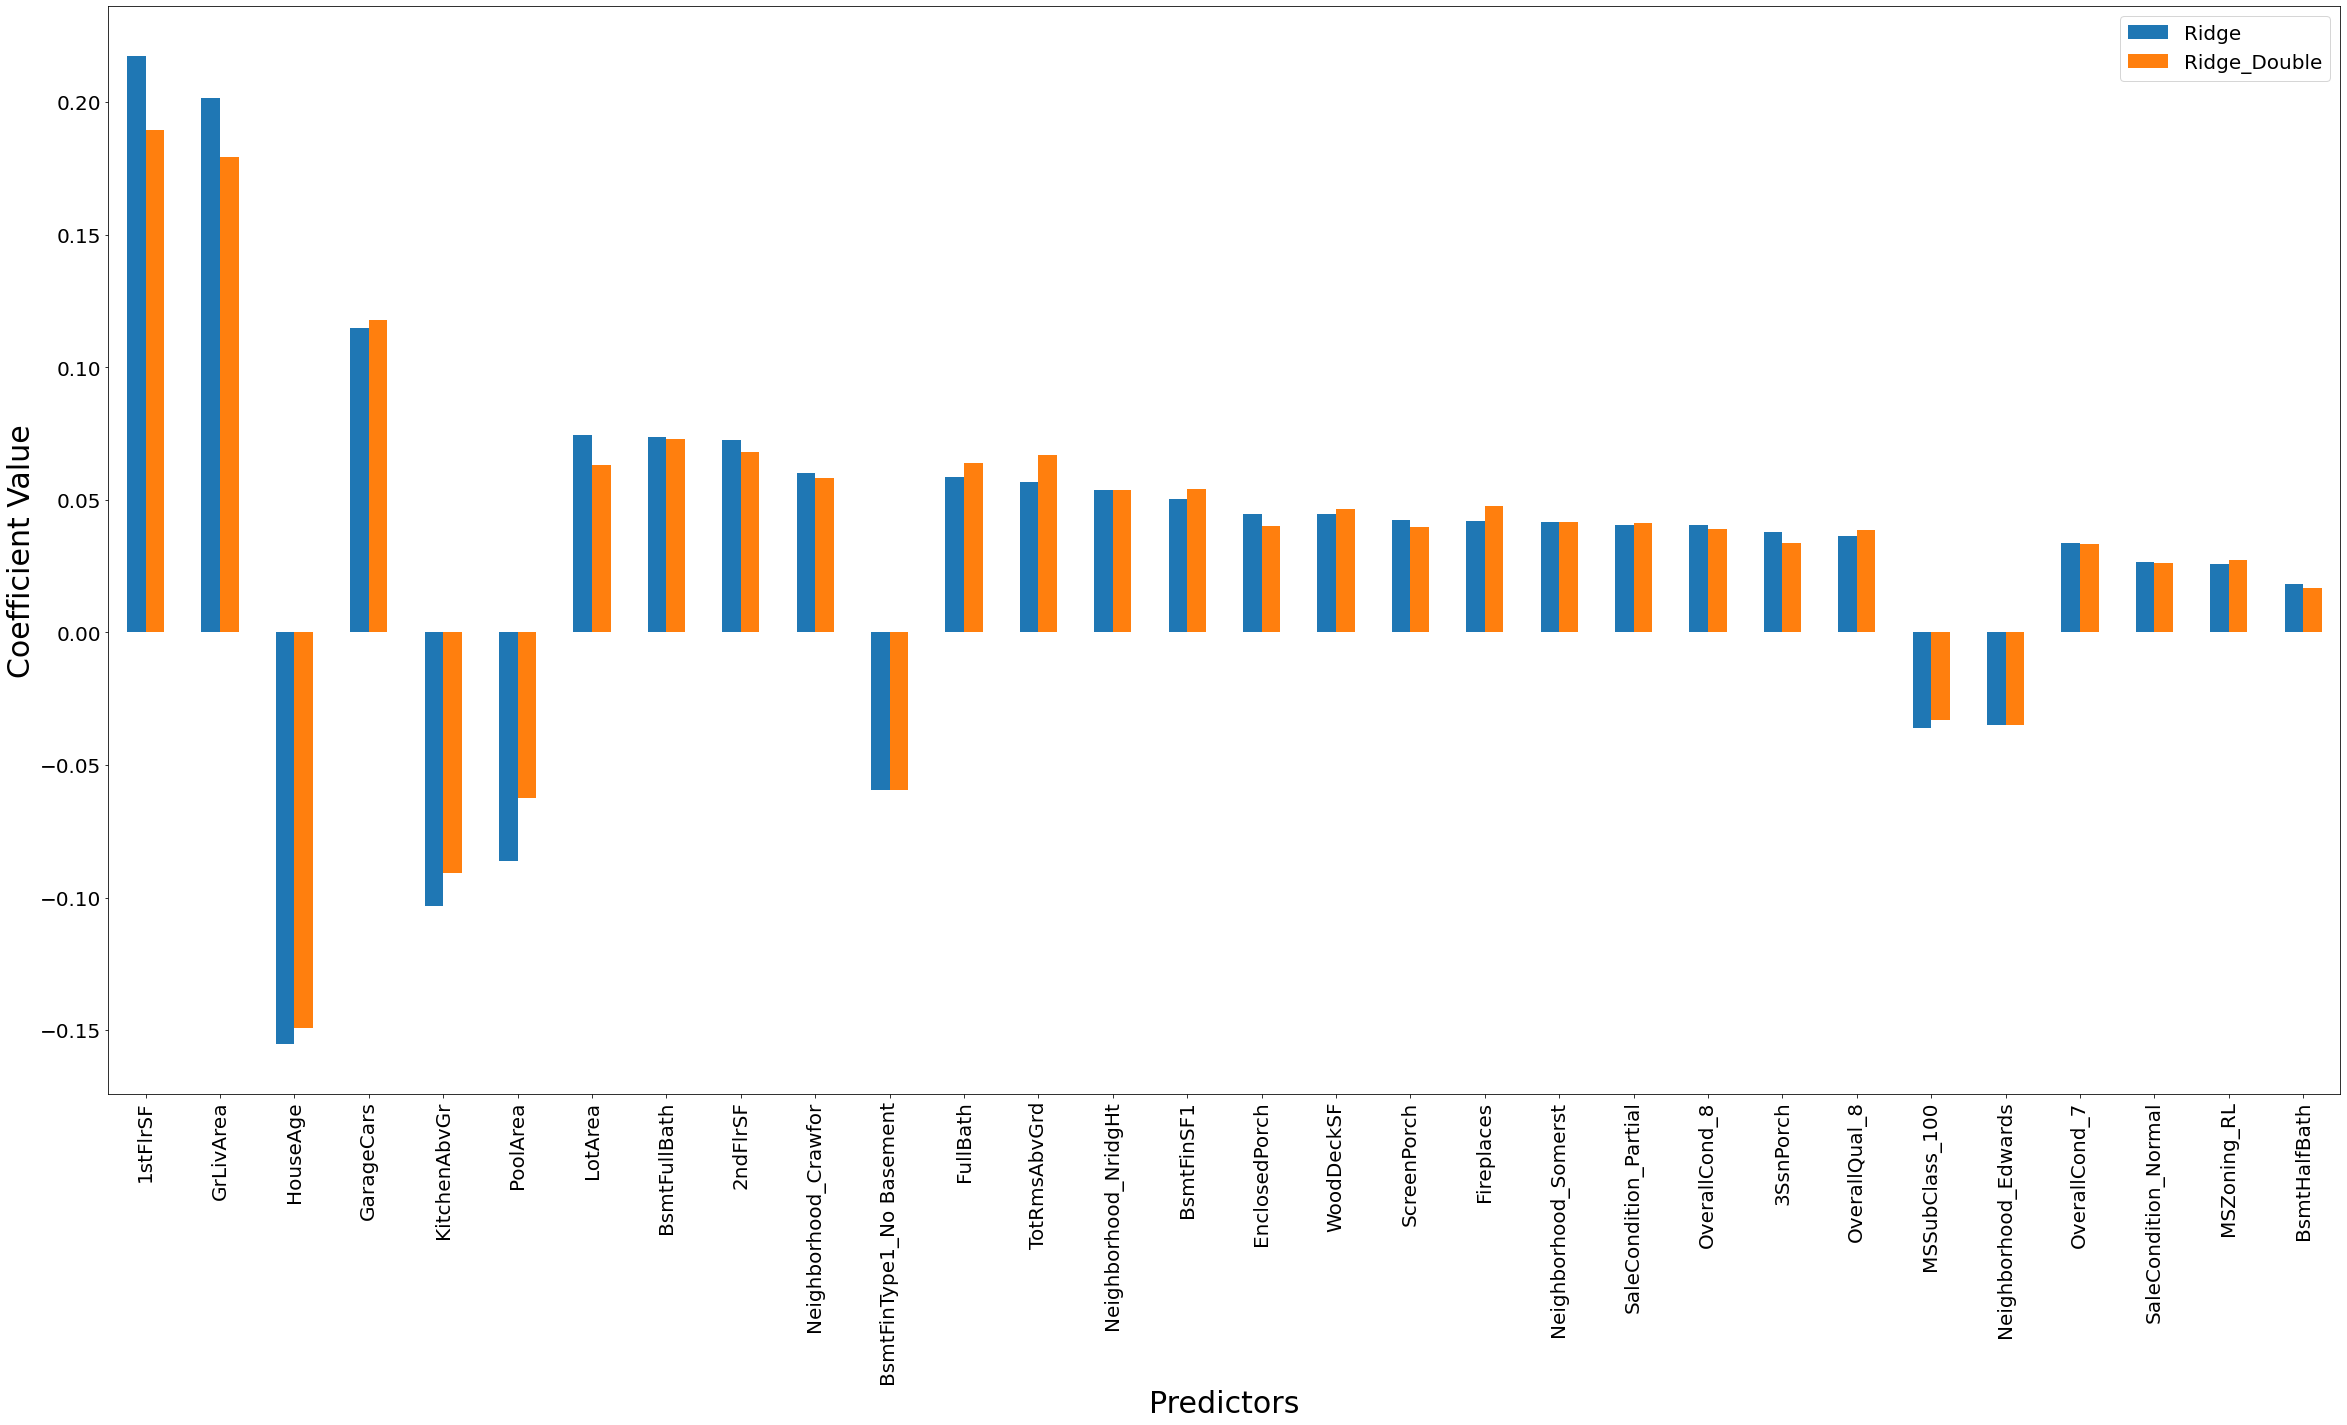

In [116]:
copy=topPredictors[['Ridge','Ridge_Double']]
## Visualize the Coefficient Value changes for Different Predictors 
plotData(copy)


## Visualize the Coefficient Value changes for Different Predictors 


In [117]:
#Sort the df as per absolute value of Lasso coefficents 
coef_df['abs_Lasso']= abs (coef_df['Lasso'])
topPredictors=coef_df.sort_values('abs_Lasso', ascending=False)

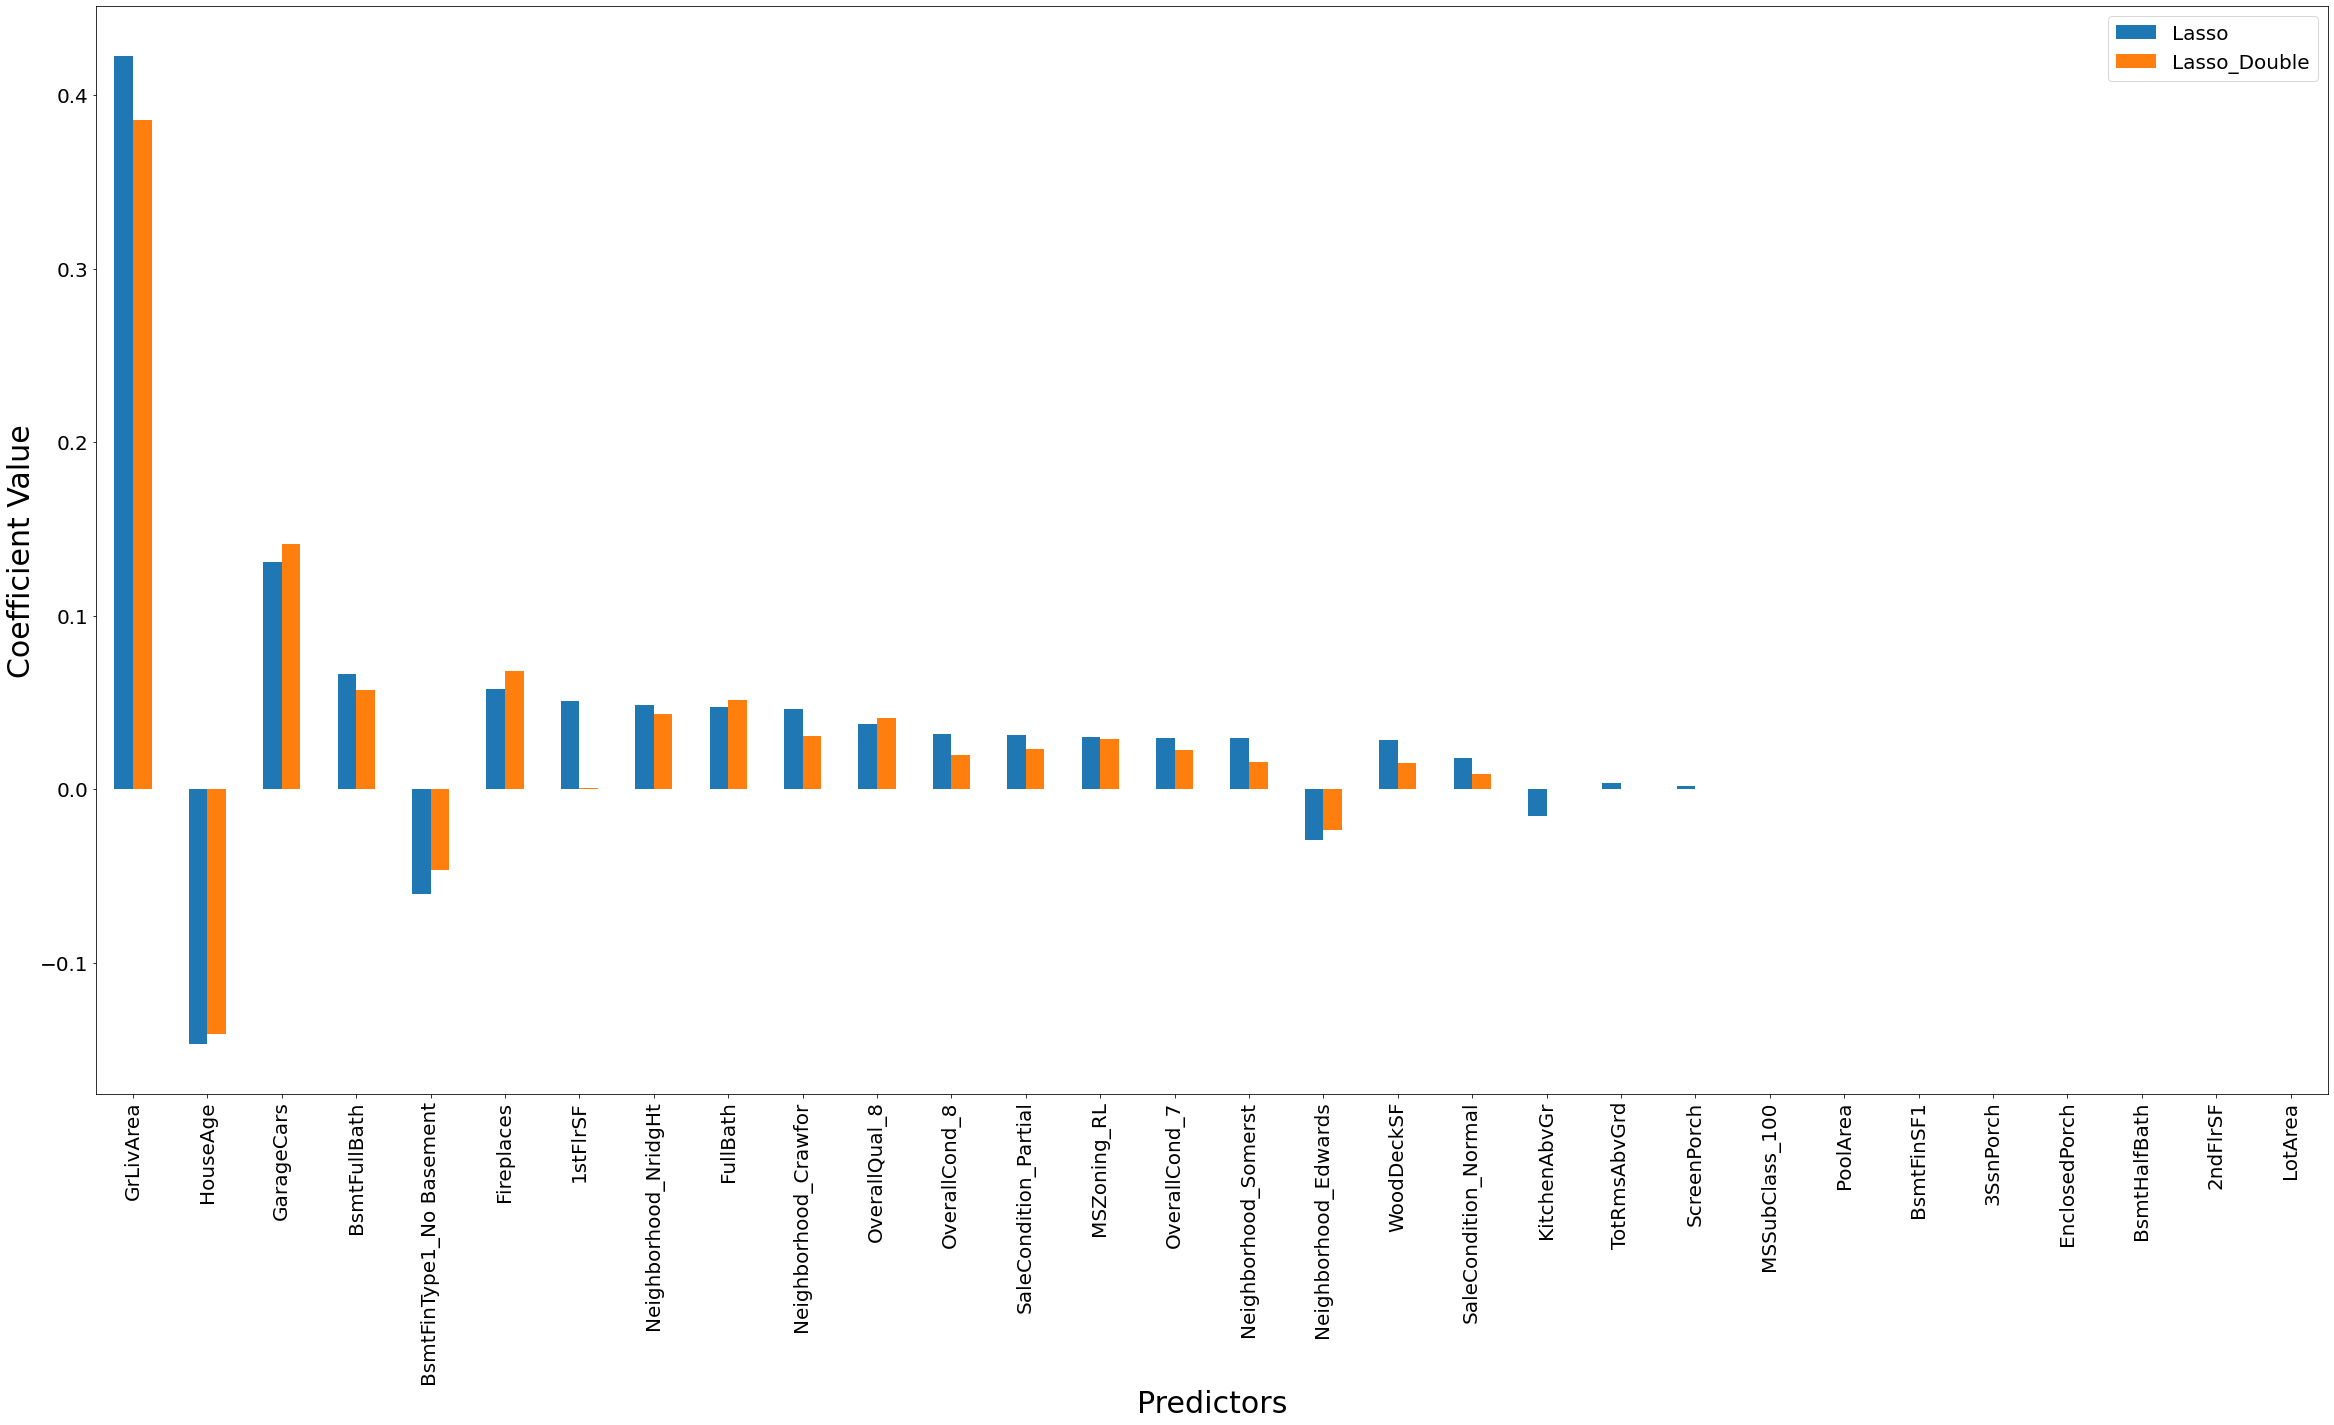

In [118]:
copy=topPredictors[['Lasso','Lasso_Double']]
## Visualize the Coefficient Value changes for Different Predictors 
plotData(copy)

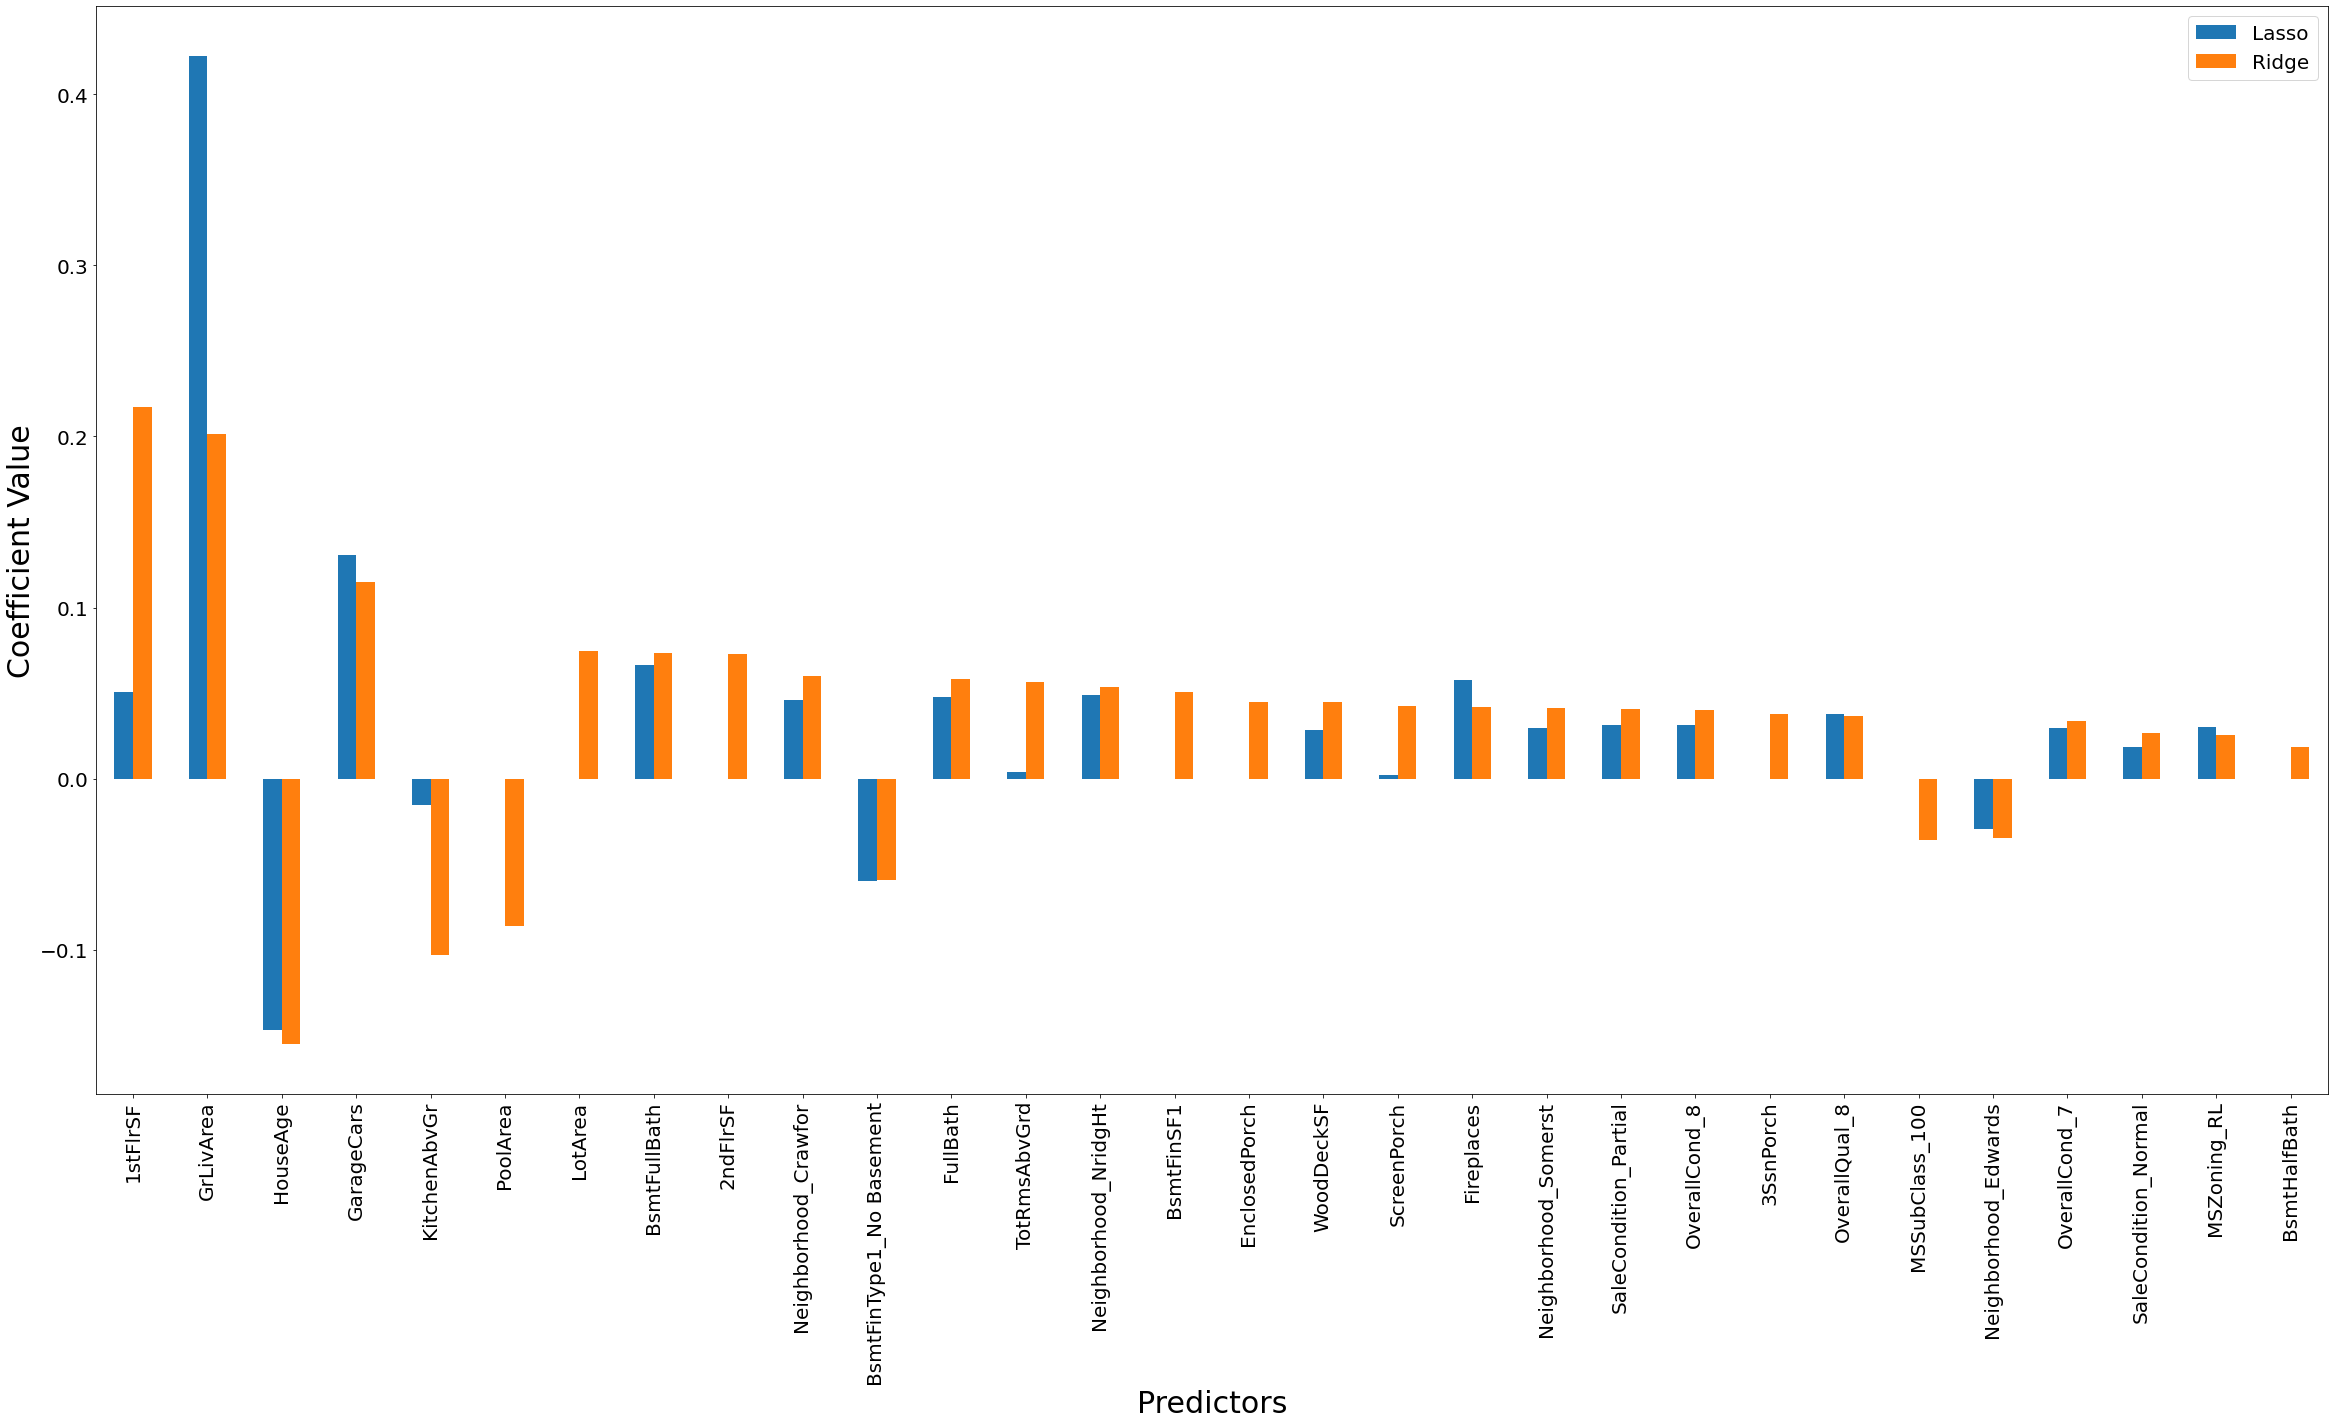

In [119]:
#Sort the df
topPredictors=coef_df.sort_values('abs_Ridge', ascending=False)
copy=topPredictors[['Lasso','Ridge']]
## Visualize the Coefficient Value changes for Different Predictors 
plotData(copy)

<h3 style = "color : Green">Observations on Doubling the values of Tuning Parameter</h3>


- R square decreases
- Mean square error increases
- Predictors in case of Lasso got reduced more.As coefficient became 0 for more predictors.
- Coefficients got changed little bit

<h3 style = "color : Brown">Removing the five most important predictor</h3>


In [120]:
X_train_rfe.columns

Index(['LotArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'HouseAge',
       'MSSubClass_100', 'MSZoning_RL', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'OverallQual_8', 'OverallCond_7', 'OverallCond_8',
       'BsmtFinType1_No Basement', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [121]:
X_test_rfe.columns

Index(['LotArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'HouseAge',
       'MSSubClass_100', 'MSZoning_RL', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'OverallQual_8', 'OverallCond_7', 'OverallCond_8',
       'BsmtFinType1_No Basement', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [122]:
#Remove top 5 Predictor from The train Data
X_train_reduced_Columns = X_train_rfe.drop(['GrLivArea','GarageCars','Fireplaces','HouseAge','BsmtFullBath'],axis=1)
X_train_reduced_Columns.columns

Index(['LotArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'BsmtHalfBath',
       'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MSSubClass_100', 'MSZoning_RL', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'OverallQual_8', 'OverallCond_7', 'OverallCond_8',
       'BsmtFinType1_No Basement', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [123]:
#Remove top 5 Predictor from The test Data
X_test_reduced_Columns= X_test_rfe.drop(['GrLivArea','GarageCars','Fireplaces','HouseAge','BsmtFullBath'],axis=1)
X_test_reduced_Columns.columns

Index(['LotArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'BsmtHalfBath',
       'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MSSubClass_100', 'MSZoning_RL', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'OverallQual_8', 'OverallCond_7', 'OverallCond_8',
       'BsmtFinType1_No Basement', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [124]:
#Optimal value of Alpha choosen for Lasso 0.0005
alpha = 0.0005
lasso_updated = Lasso(alpha=alpha)
lasso_updated.fit(X_train_reduced_Columns, y_train)

Lasso(alpha=0.0005)

In [125]:
y_pred_train = lasso_updated.predict(X_train_reduced_Columns)
y_pred_test = lasso_updated.predict(X_test_reduced_Columns)

In [126]:
Lasso_Updated_Train=printMetrices(y_train,y_pred_train,"LassoWithReducedColumns-Train")
Lasso_Updated_Test=printMetrices(y_test,y_pred_test,"LassoWithReducedColumns-Test")

LassoWithReducedColumns-Train  R2 Score:  0.7654470883540482
LassoWithReducedColumns-Train  - RSS: 4.546056322467787
LassoWithReducedColumns-Train  - MSE :  0.0039156385206440885
LassoWithReducedColumns-Test  R2 Score:  0.7911673584486455
LassoWithReducedColumns-Test  - RSS: 1.1105445569166217
LassoWithReducedColumns-Test  - MSE :  0.0038163043193011055


<h3 style = "color : Green">Observation after Removing the five most important predictor</h3>

In [127]:
ls__updated_metric = pd.Series(Lasso_Updated_Train+Lasso_Updated_Test, name = 'Lasso With Reduced Columns Regression')
finalTable = pd.concat([Index,ls_metric,ls__updated_metric], axis = 1)
finalTable

,Metric,Lasso Regression,Lasso With Reduced Columns Regression
0,R2 Score (Train),0.829715,0.765447
1,RSS (Train),3.300430,4.546056
2,MSE (Train),0.053317,0.062575
3,R2 Score (Test),0.840927,0.791167
4,RSS (Test),0.845929,1.110545
5,MSE (Test),0.053916,0.061776


In [128]:
coef_df = pd.DataFrame(index=X_train_reduced_Columns.columns)
coef_df.rows = X_train_reduced_Columns.columns

coef_df['Lasso_Updated'] = lasso_updated.coef_
coef_df['abs_value_coeff']= abs (coef_df['Lasso_Updated'])
coef_df.sort_values('abs_value_coeff', ascending=False)


,Lasso_Updated,abs_value_coeff
1stFlrSF,0.472614,0.472614
2ndFlrSF,0.169707,0.169707
BsmtFinSF1,0.157022,0.157022
FullBath,0.128565,0.128565
KitchenAbvGr,-0.115175,0.115175
Neighborhood_NridgHt,0.074097,0.074097
WoodDeckSF,0.071014,0.071014
Neighborhood_Somerst,0.068921,0.068921
Neighborhood_Edwards,-0.064152,0.064152
SaleCondition_Partial,0.063434,0.063434
